In [213]:
import pandas as pd

# Daten camping.ch
## Import

In [684]:
df_camping = pd.read_csv('campingspider/camping.csv', encoding='utf-8')
df_camping.head()

url  \
0  https://camping.ch/de/campingplatz/tessin/meri...   
1  https://camping.ch/de/campingplatz/wallis/fies...   
2  https://camping.ch/de/campingplatz/wallis/les-...   
3  https://camping.ch/de/campingplatz/berner-ober...   
4  https://camping.ch/de/campingplatz/tessin/mont...   

                        name                  locality website  star category  \
0  Camping Monte San Giorgio          6866 Meride (TI)     NaN              4   
1                  Eggishorn          3984 Fiesch (VS)     NaN              4   
2                La Médettaz  1923 Les Marécottes (VS)     NaN              2   
3                     Gadmen          3863 Gadmen (BE)     NaN              2   
4          Bosco della Bella       6998 Monteggio (TI)     NaN              0   

   activities  tourist pitches         open (seasons 1) open (seasons 2)  \
0           8             64.0  19.04.2024 − 29.09.2024              NaN   
1           6            127.0  01.01.2024 − 31.12.2024              NaN   
2           5             30.0  01.05.2024 − 30.09.2024              NaN   
3          11             50.0  01.05.2024 − 31.10.2024              NaN   
4           2              NaN  01.01.2024 − 31.12.2024              NaN   

  open (seasons 3)  ... laundry dryer / tumble dryer hiking  \
0              NaN  ...                            0      1   
1              NaN  ...                            0      1   
2              NaN  ...                            1      1   
3              NaN  ...                            0      0   
4              NaN  ...                            0      0   

  lake with sandy beach  lake with stony beach  river  train station  bus  \
0                     0                      0      1              0    1   
1                     0                      0      1              1    1   
2                     0                      0      0              1    1   
3                     0                      0      0              0    0   
4                     0                      0      1              0    0   

   VSC membership  TCS membership  SCCV membership  
0               1               1                0  
1               1               0                0  
2               0               0                0  
3               1               0                0  
4               0               0                0  

[5 rows x 48 columns]

## Ersetzen von falschen Werten

In [685]:
# Folgende drei Saisondaten waren falsch hinterlegt (mit null Tagen) und wurden deshalb manuell nachgeschaut. Die restlichen Saisondaten wurden nicht nachgeprüft.
corrections_date = {
    'Camping Bellavista': '12.04.2024 - 13.10.2024',
    'Camping Schaffhausen - Freizeitanlage Rheinwiese': '27.03.2024 - 20.10.2024',
    'Nufenenpark': '01.06.2024 - 30.09.2024'
}

# Funktion zur Korrektur der Datumsangaben
def correct_dates(row):
    if row['name'] in corrections_date:
        return corrections_date[row['name']]
    return row['open (seasons 1)']

# Datumsangaben im DataFrame korrigieren
df_camping['open (seasons 1)'] = df_camping.apply(correct_dates, axis=1)

In [686]:
# Quelle: Internetseite der Campingplätze. Es wurden nur die Campingplätze mit Anzahl Touristenplätze < 10 und 'nan' geprüft.
corrections_pitches = {
    'https://camping.ch/de/campingplatz/ostschweiz/weesen/camping-gaesi?l=true': 70,
    'https://camping.ch/de/campingplatz/waadt-genfersee/forel/camping-de-forel?l=true': 43,
    'https://camping.ch/de/campingplatz/ostschweiz/Altst%25C3%25A4tten/allmend_rheintal?l=true': 150,
    'https://camping.ch/de/campingplatz/wallis/ritzingen/camping-brigga?l=true': 127,
    'https://camping.ch/de/campingplatz/ostschweiz/mammern/seewiese?l=true': 95,
    'https://camping.ch/de/campingplatz/zentralschweiz/seelisberg/naturcamping_seelisberg?l=true': 60,
    'https://camping.ch/de/campingplatz/tessin/monteggio/boscodellabella?l=true': 10,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-noirmont/camping-du-creux-des-biches?l=true': 40,
    'https://camping.ch/de/campingplatz/zentralschweiz/sisikon/camping_bucheli?l=true': 50,
    'https://camping.ch/de/campingplatz/wallis/sembrancher/la-prairie?l=true': 48,
    'https://camping.ch/de/campingplatz/berner-mitelland/rueschegg-heubach/camping-rueschegg-heubach?l=true': 20,
    'https://camping.ch/de/campingplatz/zentralschweiz/morgarten/camping_neselen?l=true': 40,
    'https://camping.ch/de/campingplatz/berner-oberland/boenigen/seeruhe?l=true': 88,
    'https://camping.ch/de/campingplatz/ostschweiz/stein-a-rhein/grenzstein?l=true': 64,
    'https://camping.ch/de/campingplatz/berner-oberland/saanen/beim-kappeli?l=true': 27,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/rebeuvilier/du-raimeux?l=true': 31,
    'https://camping.ch/de/campingplatz/berner-oberland/gsteig-b-gstaad/bergcamping-gsteig?l=true': 16,
    'https://camping.ch/de/campingplatz/berner-oberland/schwenden-im-diemtigtal/camping-eggmatte-diemtigtal?l=true': 16,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-landeron/bellerive-le-landeron?l=true': 50,
}

# Funktion zur Korrektur der Datumsangaben
def correct_dates(row):
    if row['url'] in corrections_pitches:
        return corrections_pitches[row['url']]
    return row['tourist pitches']

# Datumsangaben im DataFrame korrigieren
df_camping['tourist pitches'] = df_camping.apply(correct_dates, axis=1)

## Berechnung prozentuale Öffnungszeiten
Tage Jahr: 365 (Vereinfachung)

In [687]:
from datetime import datetime
# Tage von Öffnung bis Schliessung der Saison
def process_column_value(value):
    # leere Zellen:
    if pd.isna(value) or value == "":
        return 0
    try:
        # wenn ein Text vor dem Datum steht, sollen die Zeichen nach dem Doppelpunkt für das Datum verwendet werden
        if ':' in value:
            middle_value = value[value.find(':') + 2: value.find(':') + 12].strip()
            open_date = datetime.strptime(middle_value, '%d.%m.%Y')
            end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
            return  (end_date - open_date).days
        end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
        open_date = datetime.strptime(value[:10].strip(), '%d.%m.%Y')
        return (end_date - open_date).days
    except:
        print(f"Fehler bei der Verarbeitung von Wert {value}")
        return 0

# für alle Saison die Tage berechnen (falls mehrere) und zusammenzählen
def calculate_row(row):
    columns = ['open (seasons 1)', 'open (seasons 2)', 'open (seasons 3)', 'open (seasons 4)', 'open (seasons 5)', 'open (seasons 6)', 'open (seasons 7)']
    total = 0
    for col in columns:
        total += process_column_value(row[col])
    return total

# Neue Spalte mit Tagen erstellen, indem die Berechnung auf jede Zeile angewandt wird
df_camping['open[day]'] = df_camping.apply(calculate_row, axis=1)

In [688]:
# prozentualer Anteil der offenen Tage am Gesamtjahr
df_camping['open[%]'] = df_camping['open[day]']/365

In [689]:
df_camping

url  \
0    https://camping.ch/de/campingplatz/tessin/meri...   
1    https://camping.ch/de/campingplatz/wallis/fies...   
2    https://camping.ch/de/campingplatz/wallis/les-...   
3    https://camping.ch/de/campingplatz/berner-ober...   
4    https://camping.ch/de/campingplatz/tessin/mont...   
..                                                 ...   
372  https://camping.ch/de/campingplatz/graubuenden...   
373  https://camping.ch/de/campingplatz/wallis/sust...   
374  https://camping.ch/de/campingplatz/waadt-genfe...   
375  https://camping.ch/de/campingplatz/nordwestsch...   
376  https://camping.ch/de/campingplatz/tessin/gord...   

                                    name                  locality  \
0              Camping Monte San Giorgio          6866 Meride (TI)   
1                              Eggishorn          3984 Fiesch (VS)   
2                            La Médettaz  1923 Les Marécottes (VS)   
3                                 Gadmen          3863 Gadmen (BE)   
4                      Bosco della Bella       6998 Monteggio (TI)   
..                                   ...                       ...   
372                        Camping Rania          7432 Zillis (GR)   
373                     Camping Monument          3952 Susten (VS)   
374                          Bois-du-Fey           1430 Orges (VD)   
375                 Campingplatz Talhaus       4416 Bubendorf (BL)   
376  TCS Camping Gordevio – Valle Maggia        6672 Gordevio (TI)   

                    website  star category  activities  tourist pitches  \
0                       NaN              4           8             64.0   
1                       NaN              4           6            127.0   
2                       NaN              2           5             30.0   
3                       NaN              2          11             50.0   
4                       NaN              0           2             10.0   
..                      ...            ...         ...              ...   
372                     NaN              3           6             35.0   
373  www.campingmonument.ch              3           6            170.0   
374                     NaN              2           6             12.0   
375                     NaN              0           4             10.0   
376                     NaN              4          11            127.0   

            open (seasons 1) open (seasons 2) open (seasons 3)  ...  \
0    19.04.2024 − 29.09.2024              NaN              NaN  ...   
1    01.01.2024 − 31.12.2024              NaN              NaN  ...   
2    01.05.2024 − 30.09.2024              NaN              NaN  ...   
3    01.05.2024 − 31.10.2024              NaN              NaN  ...   
4    01.01.2024 − 31.12.2024              NaN              NaN  ...   
..                       ...              ...              ...  ...   
372  01.01.2024 − 31.12.2024              NaN              NaN  ...   
373  01.05.2024 − 24.09.2024              NaN              NaN  ...   
374  01.03.2024 − 31.10.2024              NaN              NaN  ...   
375  01.01.2024 − 31.12.2024              NaN              NaN  ...   
376  01.04.2024 − 24.10.2024              NaN              NaN  ...   

    lake with sandy beach lake with stony beach river  train station  bus  \
0                       0                     0     1              0    1   
1                       0                     0     1              1    1   
2                       0                     0     0              1    1   
3                       0                     0     0              0    0   
4                       0                     0     1              0    0   
..                    ...                   ...   ...            ...  ...   
372                     0                     0     1              0    1   
373                     0                     0     1              1    1   
374                     0                     0     0             

## Zusammenfassung der Attribute/Faktoren
z.B. Wassersportanlage ist vorhanden, wenn es entweder einen indoor swimming pool, unheated pool oder bathing facilities gibt. Dazu werden die Werte dieser Spalten zusammengezählt und wenn der Wert null ist, bleibt er null, ansonsten wird eine Eins in eine neue Spalte geschrieben.

In [690]:
# Sport Fields
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['sport field'] + row['golf'] + row['tennis']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['sport_fields_result'] = df_camping.apply(calculate_result, axis=1)

In [691]:
# Watersports Facilities
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['indoor swimming pool'] + row['unheated pool'] + row['bathing facilities']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['watersports_facilities_result'] = df_camping.apply(calculate_result, axis=1)

In [692]:
# Rentals
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['boat rental'] + row['bike rental']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['rentals_sporting_goods_result'] = df_camping.apply(calculate_result, axis=1)

In [693]:
# Restaurants, Bars
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['restaurant'] + row['take away']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['restaurant_bars_result'] = df_camping.apply(calculate_result, axis=1)

In [694]:
# shopping
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['shop with limited range'] + row['kiosk'] + row['shopping centre'] + row['shop with rich range']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['shopping_result'] = df_camping.apply(calculate_result, axis=1)

In [695]:
# washing
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['washing machine'] + row['laundry dryer / tumble dryer']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['washing_result'] = df_camping.apply(calculate_result, axis=1)

In [696]:
# water side
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['lake with sandy beach'] + row['lake with stony beach'] + row['river']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['water_side_result'] = df_camping.apply(calculate_result, axis=1)

In [697]:
# public transport
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['train station'] + row['bus']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['public_transport_result'] = df_camping.apply(calculate_result, axis=1)

In [698]:
# membership
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['VSC membership'] + row['TCS membership'] + row['SCCV membership']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['membership_result'] = df_camping.apply(calculate_result, axis=1)

## Aufbau verkürzter Tabelle

In [699]:
df_camping_clean =df_camping[['url', 'name', 'locality', 'sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result' ]]

In [700]:
df_camping_clean

url  \
0    https://camping.ch/de/campingplatz/tessin/meri...   
1    https://camping.ch/de/campingplatz/wallis/fies...   
2    https://camping.ch/de/campingplatz/wallis/les-...   
3    https://camping.ch/de/campingplatz/berner-ober...   
4    https://camping.ch/de/campingplatz/tessin/mont...   
..                                                 ...   
372  https://camping.ch/de/campingplatz/graubuenden...   
373  https://camping.ch/de/campingplatz/wallis/sust...   
374  https://camping.ch/de/campingplatz/waadt-genfe...   
375  https://camping.ch/de/campingplatz/nordwestsch...   
376  https://camping.ch/de/campingplatz/tessin/gord...   

                                    name                  locality  \
0              Camping Monte San Giorgio          6866 Meride (TI)   
1                              Eggishorn          3984 Fiesch (VS)   
2                            La Médettaz  1923 Les Marécottes (VS)   
3                                 Gadmen          3863 Gadmen (BE)   
4                      Bosco della Bella       6998 Monteggio (TI)   
..                                   ...                       ...   
372                        Camping Rania          7432 Zillis (GR)   
373                     Camping Monument          3952 Susten (VS)   
374                          Bois-du-Fey           1430 Orges (VD)   
375                 Campingplatz Talhaus       4416 Bubendorf (BL)   
376  TCS Camping Gordevio – Valle Maggia        6672 Gordevio (TI)   

     sport_fields_result  watersports_facilities_result  \
0                      0                              0   
1                      0                              1   
2                      0                              0   
3                      0                              0   
4                      0                              0   
..                   ...                            ...   
372                    0                              1   
373                    0                              1   
374                    0                              0   
375                    0                              0   
376                    0                              0   

     rentals_sporting_goods_result  entertainment  playground  disco  wifi  \
0                                1              0           0      0     0   
1                                0              0           1      0     0   
2                                1              0           0      0     0   
3                                0              0           0      0     0   
4                                0              0           0      0     0   
..                             ...            ...         ...    ...   ...   
372                              0              0           0      0     1   
373                              1              0           1      0     0   
374                              0              0           1      0     0   
375                              0              0           0      0     0   
376                              1              0           0      0     0   

     ...   open[%]  restaurant_bars_result  shopping_result  washing_result  \
0    ...  0.446575                       0                0               1   
1    ...  1.000000                       1                1               1   
2    ...  0.416438                       1                1               1   
3    ...  0.501370                       0                0               0   
4    ...  1.000000                       0                0               0   
..   ...       ...                     ...              ...             ...   
372  ...  1.000000                       1                0               1   
373  ...  0.400000                       1                1               1   
374  ...  0.668493                       0                0               1   
375  ...  1.000000                       1                0               1  

In [701]:
# Bearbeitete Daten als CSV speichern
df_camping_clean.to_csv('camping_clean.csv', encoding='utf-8', index=False)

# Manuelle Daten (Preis)
## Import

In [702]:
df_price = pd.read_csv('rohdaten_preis.csv', encoding='utf-8', sep=';')
df_price


url  \
0    https://camping.ch/de/campingplatz/graubuenden...   
1    https://camping.ch/de/campingplatz/graubuenden...   
2    https://camping.ch/de/campingplatz/graubuenden...   
3    https://camping.ch/de/campingplatz/graubuenden...   
4    https://camping.ch/de/campingplatz/graubuenden...   
..                                                 ...   
821  https://camping.ch/de/campingplatz/berner-mite...   
822  https://camping.ch/de/campingplatz/berner-mite...   
823  https://camping.ch/de/campingplatz/berner-mite...   
824  https://camping.ch/de/campingplatz/berner-mite...   
825  https://camping.ch/de/campingplatz/berner-mite...   

                                            Preisseite   Latitude  Longitude  \
0    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
1    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
2    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
3    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
4    https://camping-lenzerheide.ch/de/camping-st-c...  46.698692   9.558404   
..                                                 ...        ...        ...   
821  https://www.camping-lindenhof.ch/de/tarife-inf...  47.093373   7.210469   
822  https://www.camping-lindenhof.ch/de/tarife-inf...  47.093373   7.210469   
823                    https://seeland-camp.ch/preise/  47.162189   7.346157   
824                    https://seeland-camp.ch/preise/  47.162189   7.346157   
825  https://camping.ch/de/campingplatz/berner-mite...  46.785982   7.403469   

     pitch at the waterfront  other accommodation  small pitch (<80 m2)  \
0                        0.0                  1.0                     1   
1                        0.0                  1.0                     0   
2                        0.0                  1.0                     1   
3                        0.0                  1.0                     0   
4                        0.0                  1.0                     1   
..                       ...                  ...                   ...   
821                      0.0                  0.0                     1   
822                      0.0                  0.0                     0   
823                      0.0                  0.0                     1   
824                      0.0                  0.0                     1   
825                      0.0                  0.0                     1   

     medium pitch  (~100 m2)  large pitch  (>110 m2)  main season  low season  \
0                          0                       0            1           0   
1                          1                       0            1           0   
2                          0                       0            0           1   
3                          1                       0            0           1   
4                          0                       0            1           0   
..                       ...                     ...          ...         ...   
821                        0                       0            1           1   
822                        1                       0            1           1   
823                        0                       0            0           1   
824                        0                       0            1           0   
825                        0                       0            1           1   

     total_price  
0           38.0  
1           43.0  
2           40.0  
3           45.0  
4           37.0  
..           ...  
821         31.2  
822         37.2  
823         26.7  
824         28.7  
825         30.5  

[826 rows x 12 columns]

In [703]:
df_price.dtypes

url                         object
Preisseite                  object
Latitude                   float64
Longitude                  float64
pitch at the waterfront    float64
other accommodation        float64
small pitch (<80 m2)         int64
medium pitch  (~100 m2)      int64
large pitch  (>110 m2)       int64
main season                  int64
low season                   int64
total_price                float64
dtype: object

In [704]:
# Umwandlung der Spalte in float
#df_price['Breitengrad'] = df_price['Breitengrad'].astype(float)
#df_price['Laengengrad'] = df_price['Laengengrad'].astype(float)

In [705]:
len(df_price)

826

## Leere Zeilen löschen

In [706]:
# alle Zeilen, welche keinen Preis hinterlegt haben, werden gelöscht
df_price = df_price[df_price['total_price'] != 0]

In [707]:
len(df_price)

806

# Zusammenführen der Tabellen

In [708]:
# Basisliste ist manuell erstellte Liste (df_price)
df_camping_all  = pd.merge(df_price, df_camping_clean, on='url', how='left')

In [709]:
df_camping_all

url  \
0    https://camping.ch/de/campingplatz/graubuenden...   
1    https://camping.ch/de/campingplatz/graubuenden...   
2    https://camping.ch/de/campingplatz/graubuenden...   
3    https://camping.ch/de/campingplatz/graubuenden...   
4    https://camping.ch/de/campingplatz/graubuenden...   
..                                                 ...   
801  https://camping.ch/de/campingplatz/berner-mite...   
802  https://camping.ch/de/campingplatz/berner-mite...   
803  https://camping.ch/de/campingplatz/berner-mite...   
804  https://camping.ch/de/campingplatz/berner-mite...   
805  https://camping.ch/de/campingplatz/berner-mite...   

                                            Preisseite   Latitude  Longitude  \
0    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
1    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
2    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
3    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
4    https://camping-lenzerheide.ch/de/camping-st-c...  46.698692   9.558404   
..                                                 ...        ...        ...   
801  https://www.camping-lindenhof.ch/de/tarife-inf...  47.093373   7.210469   
802  https://www.camping-lindenhof.ch/de/tarife-inf...  47.093373   7.210469   
803                    https://seeland-camp.ch/preise/  47.162189   7.346157   
804                    https://seeland-camp.ch/preise/  47.162189   7.346157   
805  https://camping.ch/de/campingplatz/berner-mite...  46.785982   7.403469   

     pitch at the waterfront  other accommodation  small pitch (<80 m2)  \
0                        0.0                  1.0                     1   
1                        0.0                  1.0                     0   
2                        0.0                  1.0                     1   
3                        0.0                  1.0                     0   
4                        0.0                  1.0                     1   
..                       ...                  ...                   ...   
801                      0.0                  0.0                     1   
802                      0.0                  0.0                     0   
803                      0.0                  0.0                     1   
804                      0.0                  0.0                     1   
805                      0.0                  0.0                     1   

     medium pitch  (~100 m2)  large pitch  (>110 m2)  main season  ...  \
0                          0                       0            1  ...   
1                          1                       0            1  ...   
2                          0                       0            0  ...   
3                          1                       0            0  ...   
4                          0                       0            1  ...   
..                       ...                     ...          ...  ...   
801                        0                       0            1  ...   
802                        1                       0            1  ...   
803                        0                       0            0  ...   
804                        0                       0            1  ...   
805                        0                       0            1  ...   

      open[%]  restaurant_bars_result shopping_result washing_result  \
0    1.000000                       0               0              1   
1    1.000000                       0               0              1   
2    1.000000                       0               0              1   
3    1.000000                       0               0              1   
4    1.000000                       1               0              1   
..        ...                     ...             ...            ...   
801  0.583562                       0               0              1   
802  0.583562              

In [710]:
len(df_camping_all)

806

## Spaltenreihenfolge ändern

In [711]:
# Neue Spaltenreihenfolge
new_order = ['name', 'locality', 'Latitude', 'Longitude', 'url', 'Preisseite', 'sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result', 'total_price']
df_camping_all = df_camping_all.reindex(columns=new_order)

In [712]:
df_camping_all

name                       locality   Latitude  \
0              Camping Gravas          7078 Lenzerheide (GR)  46.722760   
1              Camping Gravas          7078 Lenzerheide (GR)  46.722760   
2              Camping Gravas          7078 Lenzerheide (GR)  46.722760   
3              Camping Gravas          7078 Lenzerheide (GR)  46.722760   
4         Camping St. Cassian  7083 Lenz b. Lenzerheide (GR)  46.698692   
..                        ...                            ...        ...   
801                 Lindenhof    ch-2572 Sutz-Lattrigen (BE)  47.093373   
802                 Lindenhof    ch-2572 Sutz-Lattrigen (BE)  47.093373   
803              Seeland Camp           2554 Meinisberg (BE)  47.162189   
804              Seeland Camp           2554 Meinisberg (BE)  47.162189   
805  Camping Rüschegg-Heubach     3154 Rüschegg-Heubach (BE)  46.785982   

     Longitude                                                url  \
0     9.555440  https://camping.ch/de/campingplatz/graubuenden...   
1     9.555440  https://camping.ch/de/campingplatz/graubuenden...   
2     9.555440  https://camping.ch/de/campingplatz/graubuenden...   
3     9.555440  https://camping.ch/de/campingplatz/graubuenden...   
4     9.558404  https://camping.ch/de/campingplatz/graubuenden...   
..         ...                                                ...   
801   7.210469  https://camping.ch/de/campingplatz/berner-mite...   
802   7.210469  https://camping.ch/de/campingplatz/berner-mite...   
803   7.346157  https://camping.ch/de/campingplatz/berner-mite...   
804   7.346157  https://camping.ch/de/campingplatz/berner-mite...   
805   7.403469  https://camping.ch/de/campingplatz/berner-mite...   

                                            Preisseite  sport_fields_result  \
0    https://camping-lenzerheide.ch/de/camping-grav...                    0   
1    https://camping-lenzerheide.ch/de/camping-grav...                    0   
2    https://camping-lenzerheide.ch/de/camping-grav...                    0   
3    https://camping-lenzerheide.ch/de/camping-grav...                    0   
4    https://camping-lenzerheide.ch/de/camping-st-c...                    0   
..                                                 ...                  ...   
801  https://www.camping-lindenhof.ch/de/tarife-inf...                    0   
802  https://www.camping-lindenhof.ch/de/tarife-inf...                    0   
803                    https://seeland-camp.ch/preise/                    0   
804                    https://seeland-camp.ch/preise/                    0   
805  https://camping.ch/de/campingplatz/berner-mite...                    0   

     watersports_facilities_result  rentals_sporting_goods_result  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              1   
..                             ...                            ...   
801                              0                              0   
802                              0                              0   
803                              0                              0   
804                              0                              0   
805                              1                              0   

     entertainment  ...  restaurant_bars_result  shopping_result  \
0                0  ...                       0                0   
1                0  ...                       0                0   
2                0  ...                       0                0   
3                0  ...                       0                0   
4                0  ...                       1                0   
..             ...  ...                     ...              ...   
801              0  ...                  

In [713]:
df_camping_all.dtypes

name                                object
locality                            object
Latitude                           float64
Longitude                          float64
url                                 object
Preisseite                          object
sport_fields_result                  int64
watersports_facilities_result        int64
rentals_sporting_goods_result        int64
entertainment                        int64
playground                           int64
disco                                int64
wifi                                 int64
TV lounge                            int64
tourist pitches                    float64
other accommodation                float64
pitch at the waterfront            float64
small pitch (<80 m2)                 int64
medium pitch  (~100 m2)              int64
large pitch  (>110 m2)               int64
easy access for disabled people      int64
animals allowed                      int64
kitchen                              int64
BBQ area   

In [714]:
df_camping_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             806 non-null    object 
 1   locality                         806 non-null    object 
 2   Latitude                         806 non-null    float64
 3   Longitude                        806 non-null    float64
 4   url                              806 non-null    object 
 5   Preisseite                       806 non-null    object 
 6   sport_fields_result              806 non-null    int64  
 7   watersports_facilities_result    806 non-null    int64  
 8   rentals_sporting_goods_result    806 non-null    int64  
 9   entertainment                    806 non-null    int64  
 10  playground                       806 non-null    int64  
 11  disco                            806 non-null    int64  
 12  wifi                  

# Visualisierung der Campingplätze
## Die Schweizer Campingplätze 2024 in der Übersicht

In [715]:
import folium

# Eine Folium-Karte erstellen
m = folium.Map(location=[df_camping_all['Latitude'].mean(), df_camping_all['Longitude'].mean()],tiles='Cartodb Positron', zoom_start=8.2,)


# Punkte auf die Karte hinzufügen
for idx, row in df_camping_all.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='#309BA0',
        fill=True,
        fill_color='#309BA0',
        fill_opacity=1,
        #popup=row['name']

    ).add_to(m)

# anzeigen
display(m)

## Korrelationen

In [716]:
df_correlation = df_camping_all.drop(['name', 'locality', 'Latitude', 'Longitude', 'url', 'Preisseite'], axis=1)

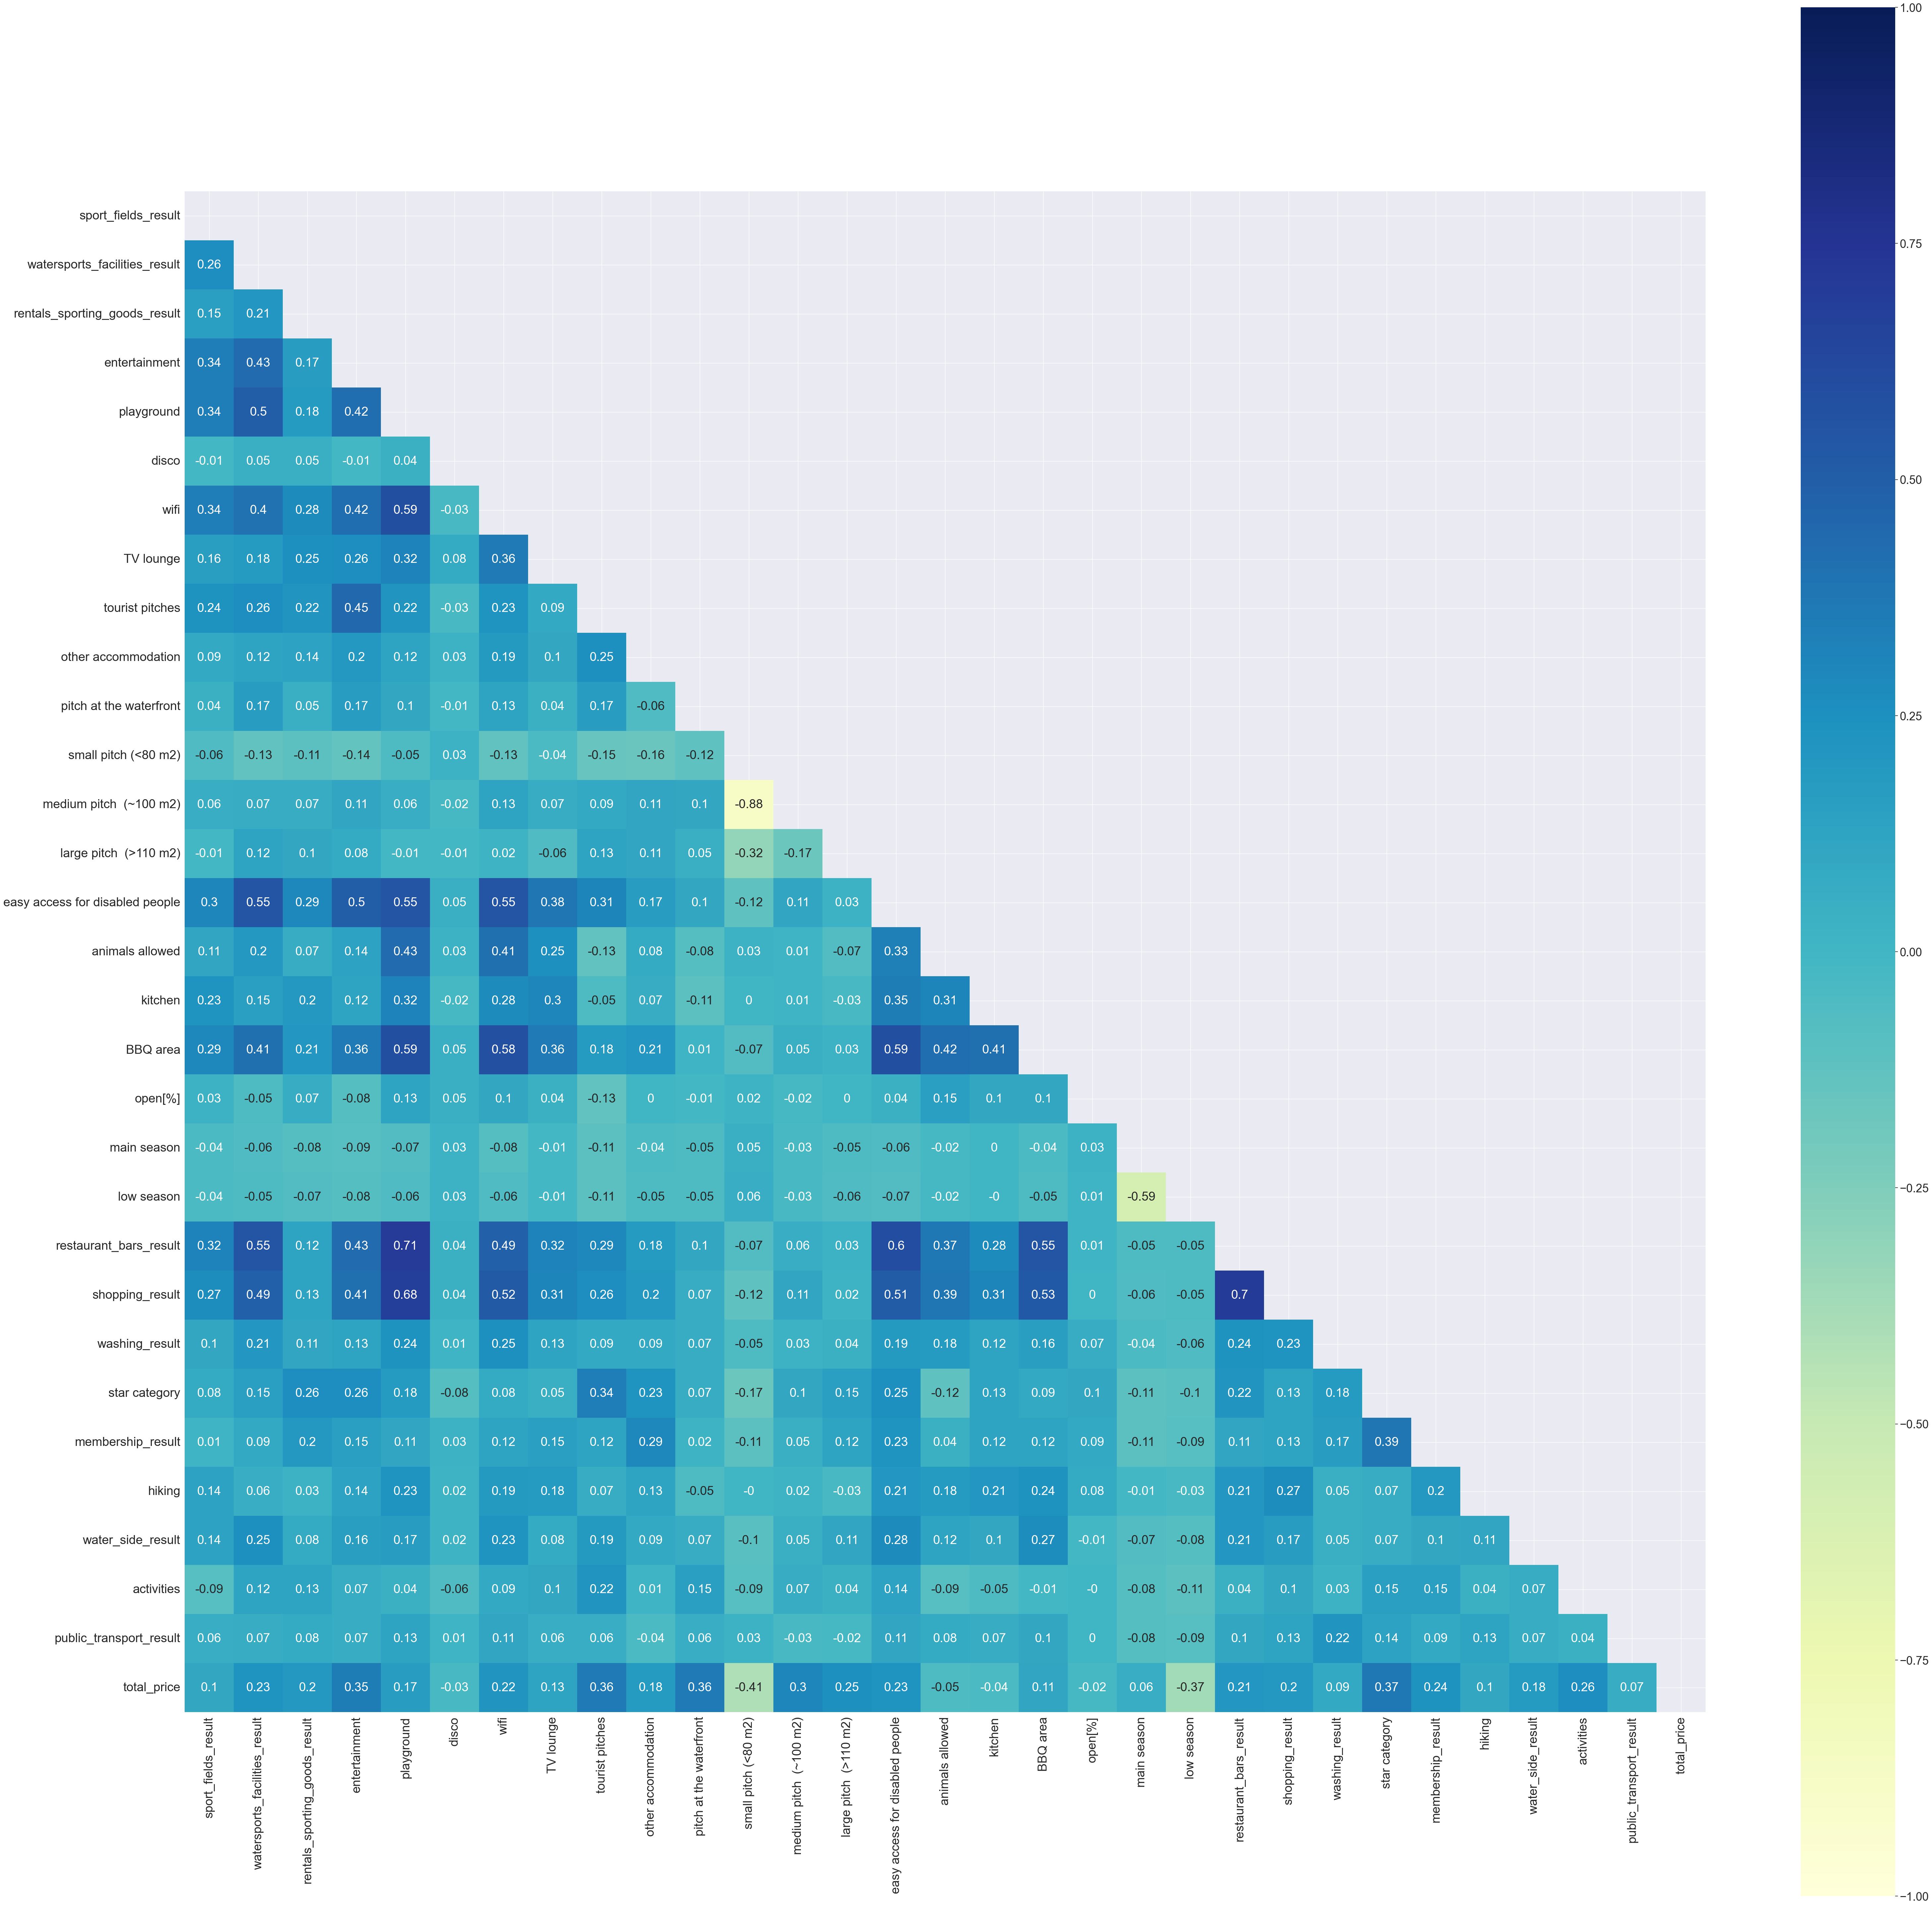

In [677]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
mask = np.zeros_like(df_correlation.corr())
mask[np.triu_indices_from(mask)] = True


# Heatmap zur Visualisierung der Korrelationen
plt.figure(figsize=(74, 74))
heatmap = sns.heatmap(df_correlation.corr().round(2), square=True, cmap='YlGnBu', vmin=-1, vmax=1, annot=True, annot_kws={'size': 27}, mask=mask)

# Schrift der Achsenbeschriftungen vergrössern
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=27)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=27)

# Schrift der Legende vergrössern
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)


plt.show()

## Statistiken

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spaltennamen ohne 'Campingplatzname'
columns = df_correlation.columns[1:]

# Mittelwerte und Standardabweichungen berechnen
mean_std = df_correlation[columns].agg(['mean', 'std'])

# Erstellen der Subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 5 * len(columns)), facecolor='white')

# Hintergrundfarbe auf weiß setzen
fig.patch.set_facecolor('white')

# Histogramme erstellen
for ax, col in zip(axes, columns):
    value_counts = df_correlation[col].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, color='#309BA0')
    ax.set_title(f'Verteilung von {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Häufigkeit')
    ax.set_ylim(0, 800)
    mean = mean_std.loc['mean', col]
    std = mean_std.loc['std', col]
    ax.text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}',
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.5))

    # Achsenhintergrundfarbe auf weiß setzen
    ax.set_facecolor('white')
    # Achsenfarben auf schwarz setzen
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='x', colors='black')

    # Hilfslinien in hellgrau
    ax.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()



In [660]:
df_camping_all[['large pitch  (>110 m2)','total_price', 'main season', 'low season']].describe()

large pitch  (>110 m2)  total_price  main season  low season
count              806.000000   806.000000   806.000000  806.000000
mean                 0.057072    38.606638     0.635236    0.619107
std                  0.232124    14.505226     0.481663    0.485908
min                  0.000000     9.500000     0.000000    0.000000
25%                  0.000000    29.325000     0.000000    0.000000
50%                  0.000000    35.330000     1.000000    1.000000
75%                  0.000000    44.750000     1.000000    1.000000
max                  1.000000   121.300000     1.000000    1.000000

Standardabweichung im Preis ist hoch

In [300]:
df_camping_all.groupby('small pitch (<80 m2)').total_price.mean()

small pitch (<80 m2)
0    46.238605
1    34.057683
Name: total_price, dtype: float64

In [301]:
df_camping_all.groupby('large pitch  (>110 m2)').total_price.mean()

large pitch  (>110 m2)
0    37.725618
1    53.162609
Name: total_price, dtype: float64

# Training


In [717]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


import numpy as np

### Train-Test-Split
die Aufteilung von Training- und Testdaten sollte immer vor der Standardisierung oder jeglicher anderen Form der Datenvorverarbeitung durchgeführt werden:
Vermeidung von Datenlecks: Wenn du die Standardisierung vor der Aufteilung durchführst, wird die Information aus den Testdaten in die Standardisierungsparameter (Mittelwert und Standardabweichung) einbezogen, was zu Datenlecks führt. Das Modell erhält somit indirekt Informationen über die Testdaten, was zu unrealistisch guten Ergebnissen führt.

Replizierbarkeit: Wenn die Standardisierung nach der Aufteilung durchgeführt wird, ist der Prozess besser replizierbar und die Ergebnisse sind realistisch, da die Standardisierung nur auf Basis der Trainingsdaten erfolgt und auf die Testdaten angewendet wird.

In [725]:
X = df_correlation.drop(['total_price'],axis = 1)
y = df_correlation['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

#### Standardisierung: Normalisieren des Dataframes
Z-Scores berechnen: für jede Zelle in jedem Spalteneintrag des DataFrames wird der Mittelwert dieser Spalte abgezogen und das Ergebnis dann durch die Standardabweichung dieser Spalte geteilt. Nach der Normalisierung befinden sich alle Werte der Spalten auf einer vergleichbaren Skala: Mittelwert von 0 und eine Standardabweichung von 1.

Bei binären Werten, welche nur Werte 0 oder 1 haben, muss keine Normalisierung stattfinden. -> Werte lieben bereits im Bereich von 0 bis 1


In [727]:

from sklearn.preprocessing import StandardScaler

# Funktion zum Erkennen von numerischen, nicht-binären Spalten
def get_columns_to_normalize(df):
    columns_to_normalize = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() > 2:
            columns_to_normalize.append(col)
    return columns_to_normalize

# Spalten wählen, die normalisiert werden sollen
columns_to_normalize = get_columns_to_normalize(X)

# StandardScaler initialisieren
scaler = StandardScaler()

# Normalisierung nur auf die Trainingsdaten anpassen und anwenden
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Normalisierung auf die Testdaten anwenden (mit den Parametern vom Trainingssatz)
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])


# Wenn du die anderen Spalten behalten möchtest, hänge sie wieder an
X_train_normalized = pd.concat([X_train.drop(columns_to_normalize, axis=1), X_train[columns_to_normalize]], axis=1)
X_test_normalized = pd.concat([X_test.drop(columns_to_normalize, axis=1), X_test[columns_to_normalize]], axis=1)


X_train_normalized

sport_fields_result  watersports_facilities_result  \
787                    0                              0   
637                    1                              0   
444                    0                              0   
332                    0                              1   
291                    0                              0   
..                   ...                            ...   
71                     0                              0   
106                    0                              0   
270                    0                              0   
435                    0                              0   
102                    0                              1   

     rentals_sporting_goods_result  entertainment  playground  disco  wifi  \
787                              0              0           0      0     0   
637                              1              0           1      0     0   
444                              0              0           0      0     0   
332                              0              0           0      0     0   
291                              1              0           1      0     1   
..                             ...            ...         ...    ...   ...   
71                               0              0           1      0     0   
106                              0              0           1      0     0   
270                              0              0           0      0     0   
435                              0              0           0      0     0   
102                              1              0           1      0     1   

     TV lounge  other accommodation  pitch at the waterfront  ...  \
787          0                  1.0                      0.0  ...   
637          0                  0.0                      0.0  ...   
444          0                  0.0                      0.0  ...   
332          0                  0.0                      1.0  ...   
291          0                  1.0                      0.0  ...   
..         ...                  ...                      ...  ...   
71           0                  1.0                      1.0  ...   
106          0                  1.0                      0.0  ...   
270          0                  1.0                      0.0  ...   
435          0                  1.0                      0.0  ...   
102          0                  1.0                      0.0  ...   

     shopping_result  washing_result  membership_result  hiking  \
787                0               1                  1       0   
637                1               1                  0       1   
444                0               1                  0       0   
332                0               1                  1       0   
291                0               1                  0       1   
..               ...             ...                ...     ...   
71                 1               1                  1       1   
106                1               0                  0       1   
270                0               1                  1       1   
435                0               1                  1       1   
102                1               1                  1       1   

     water_side_result  public_transport_result  tourist pitches   open[%]  \
787                  1                        1         0.501151 -0.556943   
637                  1                        1         0.159733 -0.841770   
444                  1                        1        -0.725425 -0.334035   
332                  1                        1        -0.219620 -0.544559   
291                  1                        1        -0.510458  1.412078   
..                 ...                      ...              ...       ...   
71                   0                        1         0.501151 -0.470257   
106                  0                        1         0.501151 -1.609564   
270                  1 

In [728]:
model_lin = LinearRegression()
model_lin = model_lin.fit(X_train_normalized, y_train)


print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_lin, X_train_normalized, y_train, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_lin, X_train_normalized, y_train, cv=4, scoring='neg_mean_squared_error').mean()}")

# R2: wie gut erklären die unabhängigen Variablen die abhängigen Variablen -> hier: sehr schlecht
# MSE:  durchschnittliche quadratische Differenz zwischen den vorhergesagten und den tatsächlichen Werten -> hier: Vorhersage weit vom tatsächlichen Wert entfernt

R2 Kreuzvalidierung Training: -1.0673606051629106e+21
MSE Kreuzvalidierung Training: 2.416726342939909e+23


In [729]:
y_test_pred = model_lin.predict(X_test_normalized)
y_train_pred = model_lin.predict(X_train_normalized)

mse_lr = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_lr}')

mse_lr_train = mean_squared_error(y_train, y_train_pred)
print(f'MSE Trainingsdaten: {mse_lr_train}')

# Modell schneidet auf Testdaten besser ab, als in Trainingsdaten ->

MSE Testdaten: 77.98779191758896
MSE Trainingsdaten: 108.45366958819086


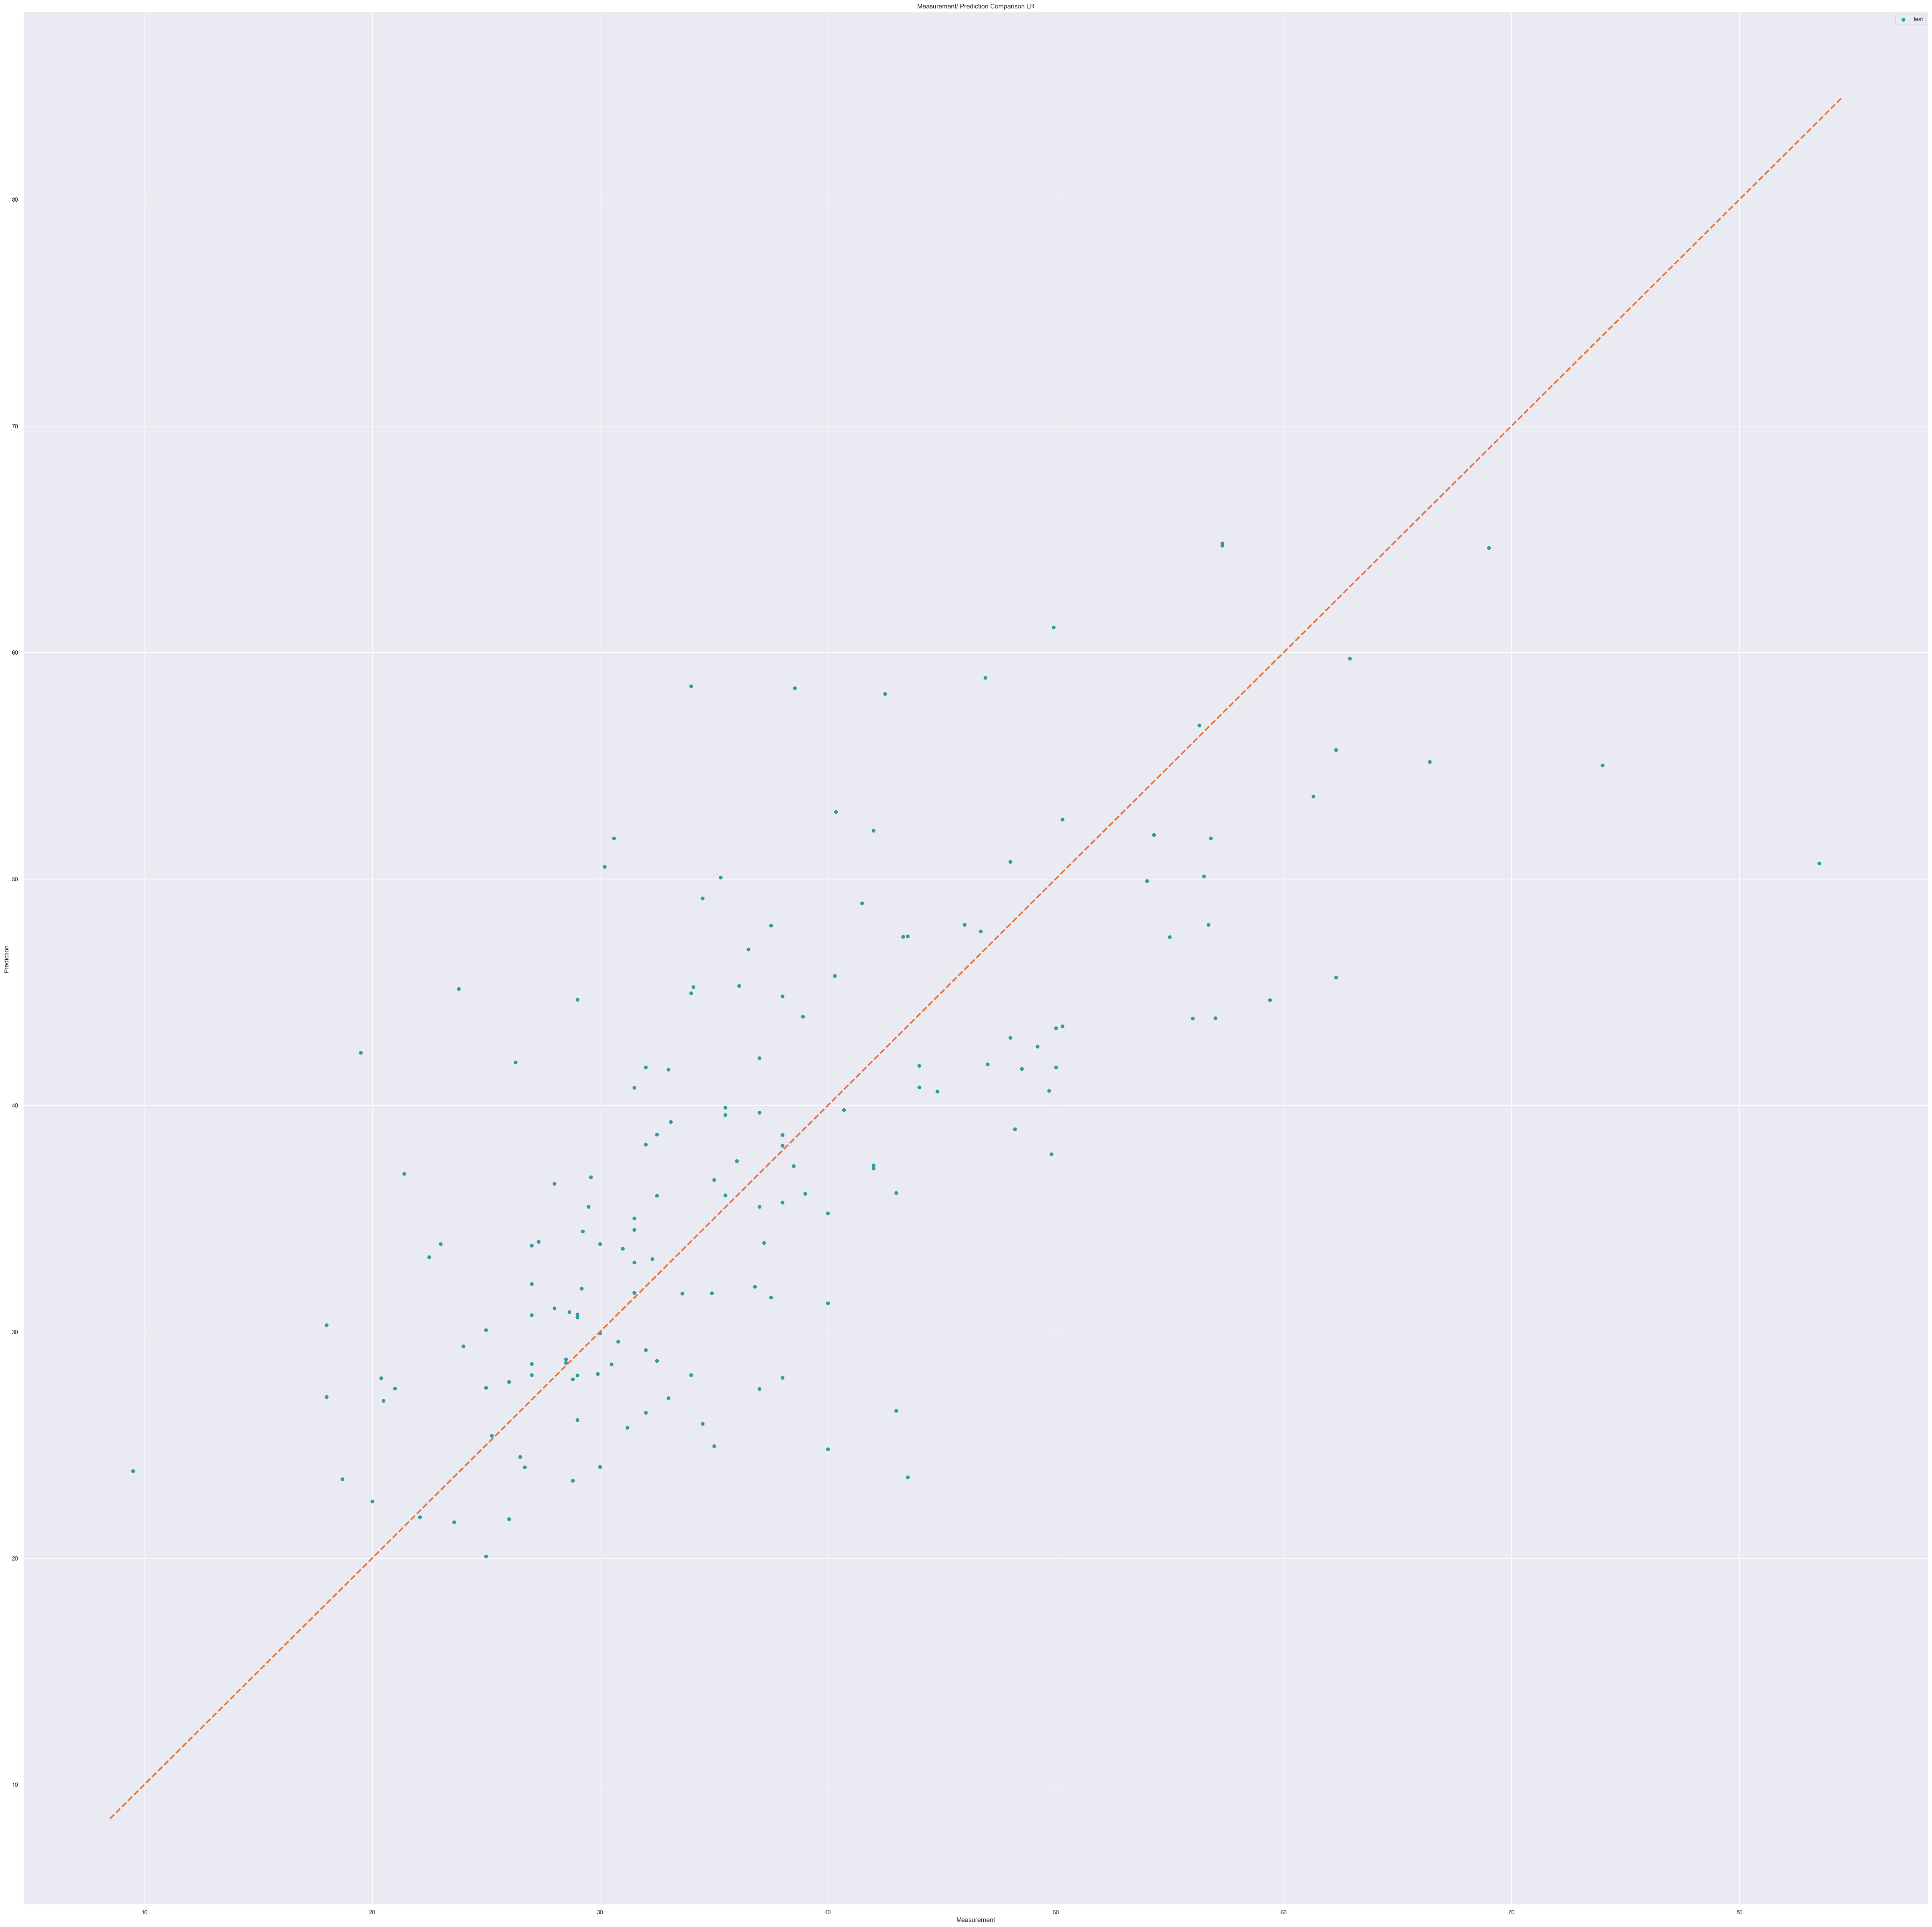

In [731]:
import matplotlib.pyplot as plt
import numpy as np
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison LR')
plt.legend()
#plt.savefig('LR.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die orange Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.

In [ ]:
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)

n_cols = 2
n_rows = int(len(X_train.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,64))
PartialDependenceDisplay.from_estimator(model_lin, X_train, X_train.columns, ax=ax, n_cols=n_cols)
#fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

### Random Forest

In [737]:
model_random = RandomForestRegressor(random_state= 42) #n_estimators=10,
model_random = model_random.fit(X_train, y_train)


print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_random, X_train, y_train, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_random, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean()}")

# R2: wie gut erklären die unabhängigen Variablen die abhängigen Variablen -> hier: moderat
# MSE:  durchschnittliche quadratische Differenz zwischen den vorhergesagten und den tatsächlichen Werten

R2 Kreuzvalidierung Training: 0.6082079851582819
MSE Kreuzvalidierung Training: 85.79832315880432


In [738]:
y_test_pred = model_random.predict(X_test)
mse_rf = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_rf}')

y_tain_pred = model_random.predict(X_train)
mse_rf_train = mean_squared_error(y_train, y_tain_pred)
print(f'MSE Trainingsdaten: {mse_rf_train}')

# Modell schneidet auf Testdaten besser ab, als in Trainingsdaten -> gute Generalisierbarkeit und kein Overfitting auf die Trainingsdaten

MSE Testdaten: 63.56396322012352
MSE Trainingsdaten: 11.962813722826082


In [ ]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison RF')
plt.legend()
#plt.savefig('RF.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die oragne Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.


In [740]:
feature_importances = model_random.feature_importances_
print('Feature Importance:', feature_importances)

Feature Importance: [1.51446597e-02 1.13789755e-02 1.41692313e-02 6.02510225e-02
 4.57856414e-03 3.26570633e-06 5.32257215e-03 1.33338677e-02
 2.03612766e-01 2.52649314e-02 6.71749407e-02 1.09372229e-01
 1.21404990e-02 1.57420004e-02 4.04798669e-03 1.18530831e-02
 7.01123007e-03 1.14137255e-02 6.91233202e-02 1.55098132e-02
 1.11875093e-01 5.60475539e-03 3.99620363e-03 1.05239282e-02
 1.11501163e-01 1.35754488e-02 1.25489593e-02 5.63940056e-03
 4.59331632e-02 2.35320024e-03]


In [741]:
feature_names = ['sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result']

# Kombiniere Feature-Namen mit deren Wichtigkeiten
feature_importance_with_names = list(zip(feature_names, feature_importances))

# Sortiere nach Wichtigkeit absteigend
feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Feature-Importance mit Feature-Namen
for feature, importance in feature_importance_with_names_sorted:
    print(f"{feature}: {importance}")

tourist pitches: 0.2036127664438129
low season: 0.11187509290265135
star category: 0.11150116340326803
small pitch (<80 m2): 0.10937222881824986
open[%]: 0.06912332022512065
pitch at the waterfront: 0.06717494070585729
entertainment: 0.060251022545055356
activities: 0.04593316316353653
other accommodation: 0.02526493143163873
large pitch  (>110 m2): 0.01574200042270636
main season: 0.015509813222362718
sport_fields_result: 0.01514465972075493
rentals_sporting_goods_result: 0.014169231303732746
membership_result: 0.013575448842098764
TV lounge: 0.013333867738687753
hiking: 0.01254895931725399
medium pitch  (~100 m2): 0.012140498966248588
animals allowed: 0.011853083102390666
BBQ area: 0.011413725471280818
watersports_facilities_result: 0.011378975473460033
washing_result: 0.010523928206590418
kitchen: 0.00701123007293827
water_side_result: 0.005639400561799973
restaurant_bars_result: 0.005604755386340282
wifi: 0.005322572151170654
playground: 0.004578564135268683
easy access for disable

In [ ]:
n_cols = 2
n_rows = int(len(X_train.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,64))
PartialDependenceDisplay.from_estimator(model_random, X_train, X_train.columns, ax=ax, n_cols=n_cols)
#fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

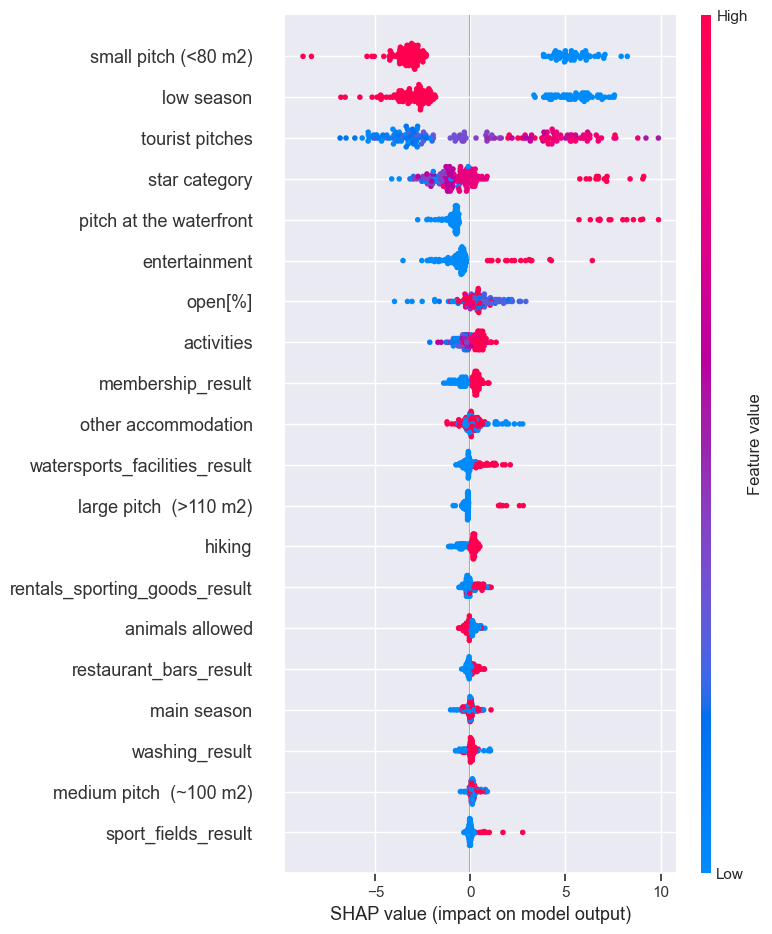

In [745]:
import shap
explainer = shap.Explainer(model_random)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

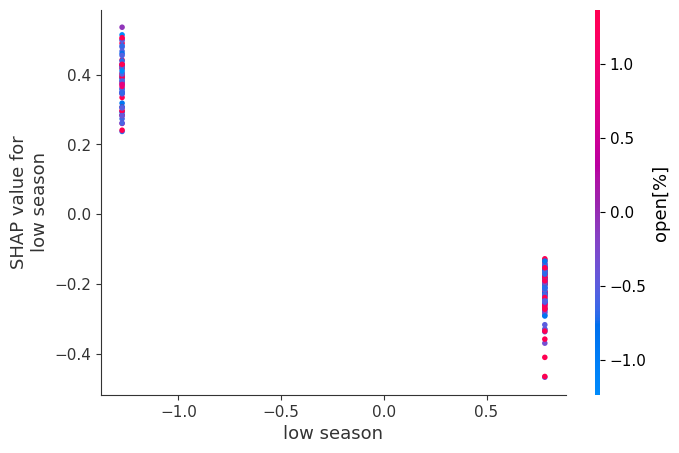

In [570]:
#shap.dependence_plot('main season', shap_values.values, X_test, feature_names=X_test.columns)
shap.dependence_plot('low season', shap_values.values, X_test, interaction_index='open[%]')

## Gradient Boosting Regressor

In [746]:
model_gradient = GradientBoostingRegressor(random_state= 42)
model_gradient = model_gradient.fit(X_train, y_train)

print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_gradient, X_train, y_train, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_gradient, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean()}")

R2 Kreuzvalidierung Training: 0.6736249959012811
MSE Kreuzvalidierung Training: 71.24024871962209


In [750]:
y_test_pred = model_gradient.predict(X_test)
mse_gr = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_gr}')

y_train_pred = model_gradient.predict(X_train)
mse_gr_train = mean_squared_error(y_train, y_train_pred)
print(f'MSE Trainingsdaten: {mse_gr_train}')

MSE Testdaten: 56.54476666931987
MSE Trainingsdaten: 30.357748578756972


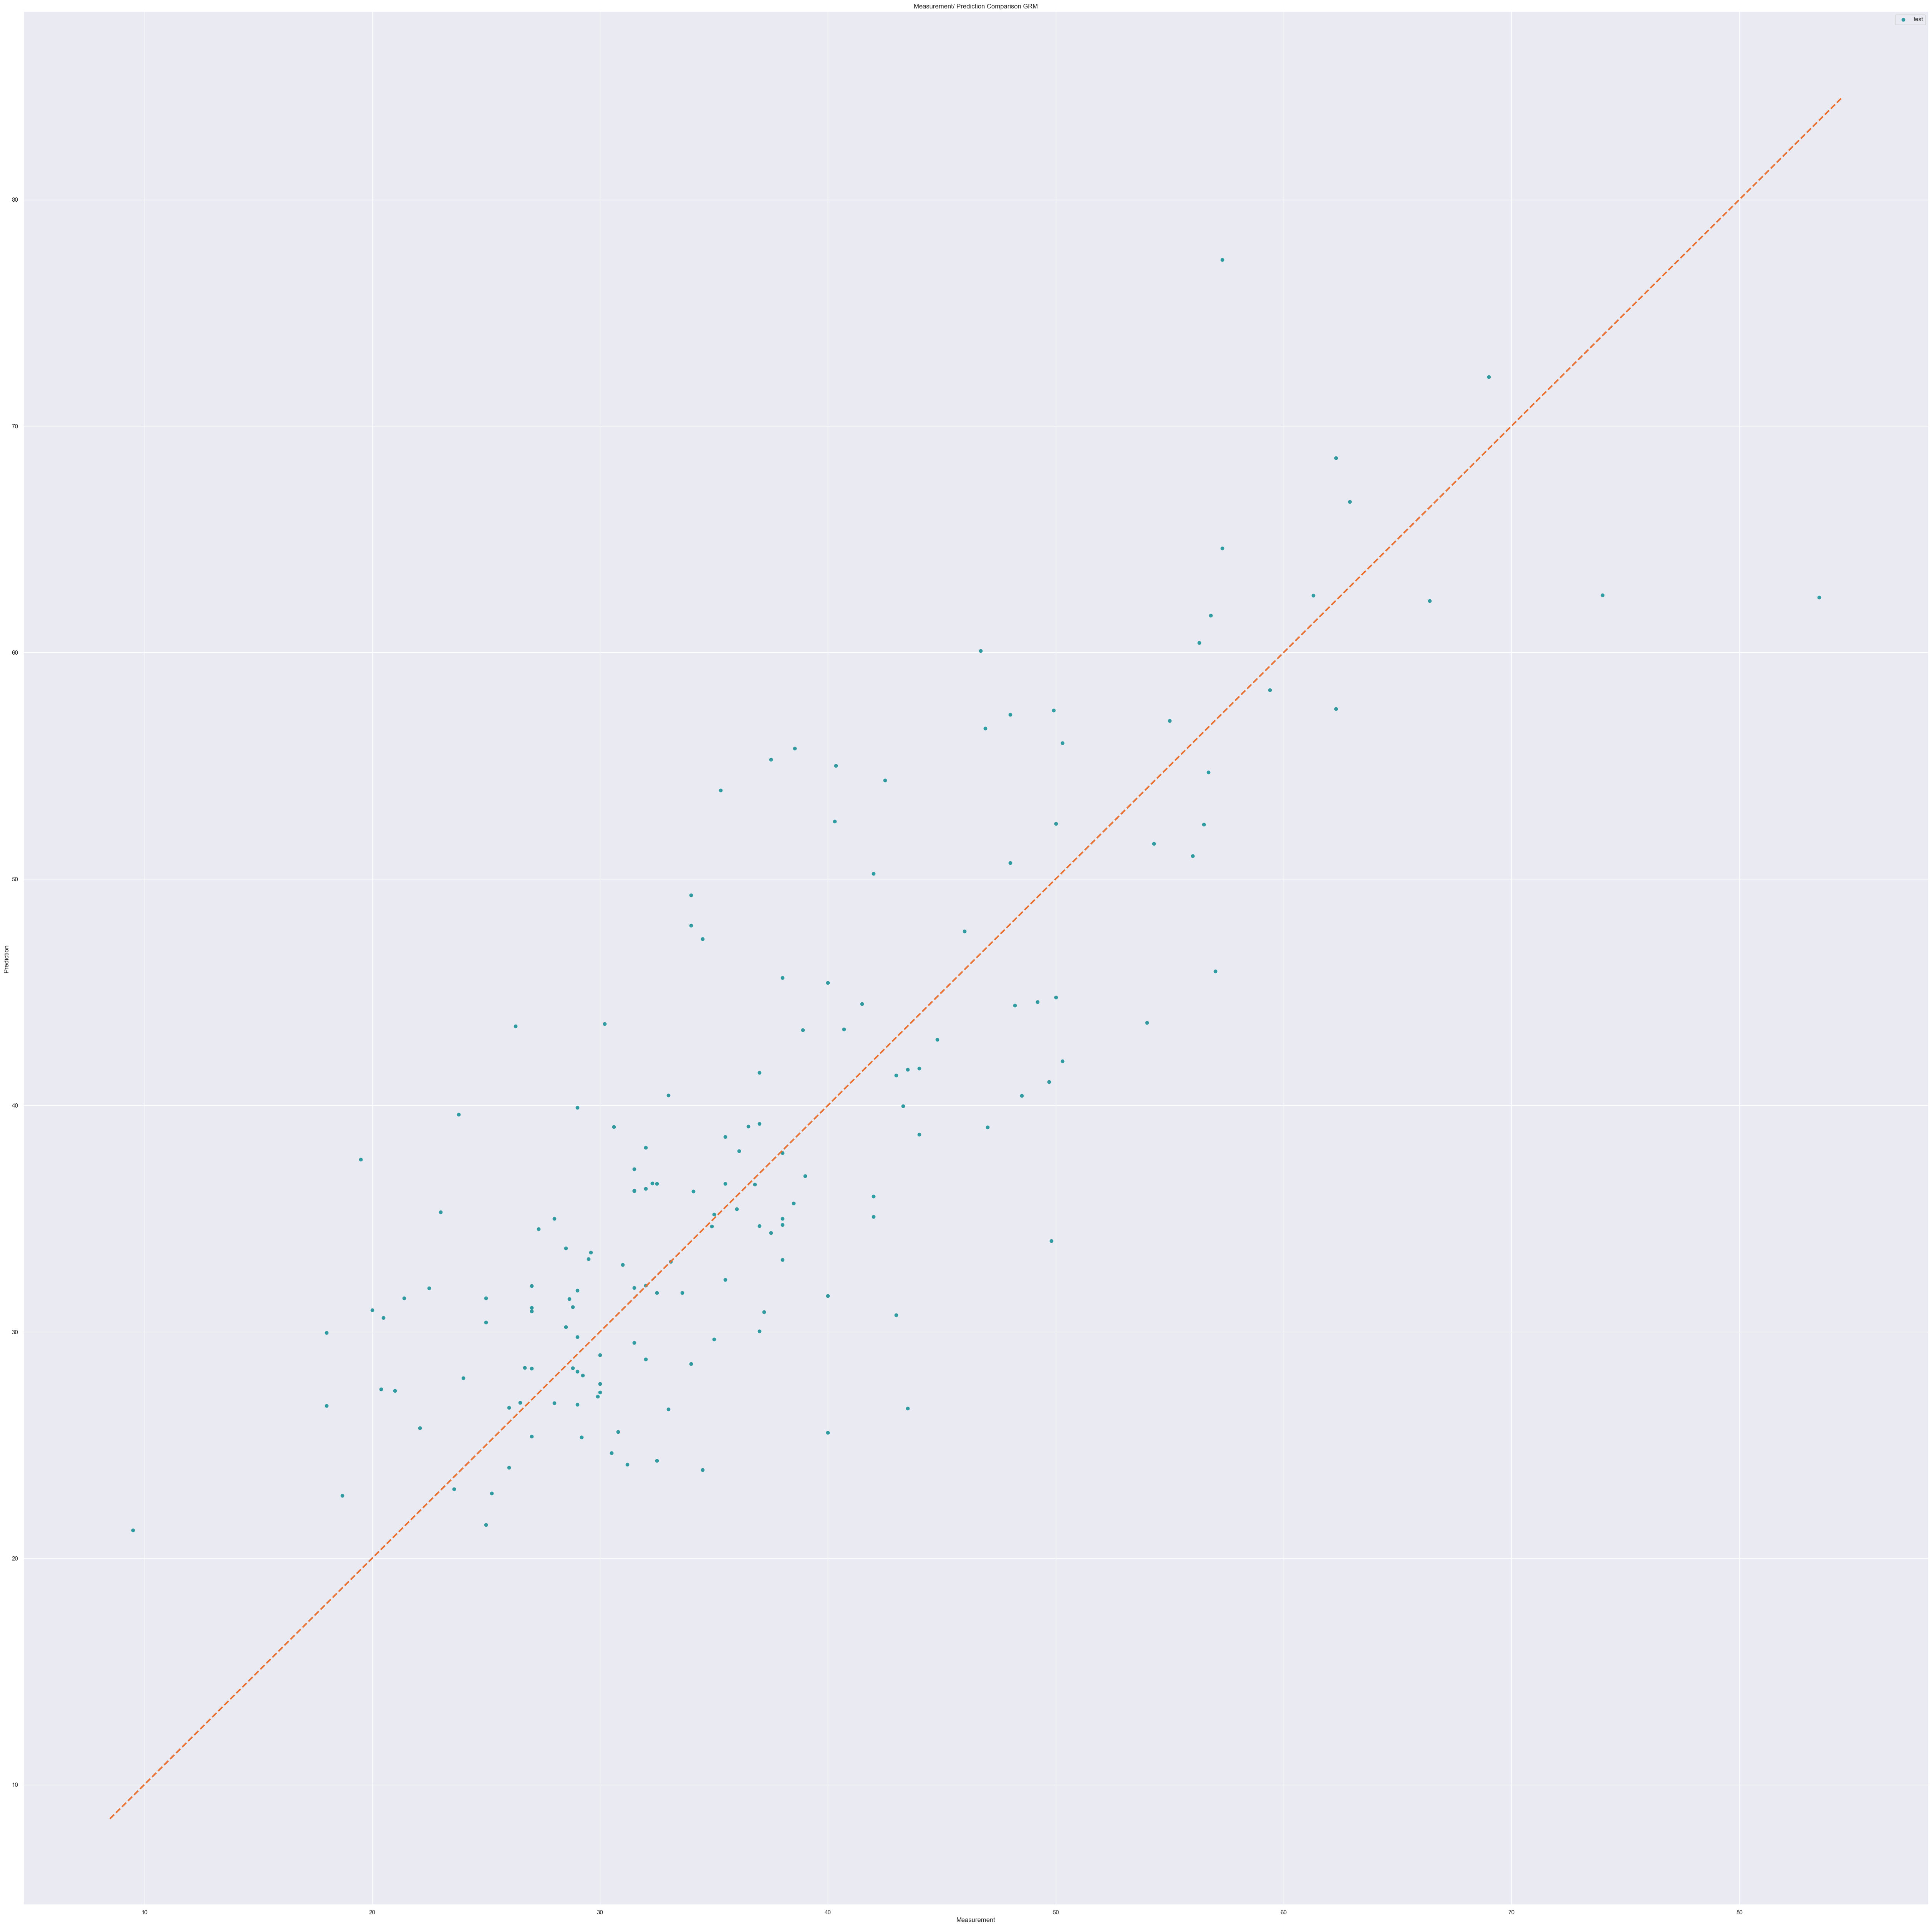

In [748]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison GRM')
plt.legend()
#plt.savefig('GB.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die oragne Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.

In [751]:
feature_importances = model_gradient.feature_importances_

feature_names = ['sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result']

# Kombiniere Feature-Namen mit deren Wichtigkeiten
feature_importance_with_names = list(zip(feature_names, feature_importances))

# Sortiere nach Wichtigkeit absteigend
feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Feature-Importance mit Feature-Namen
for feature, importance in feature_importance_with_names_sorted:
    print(f"{feature}: {importance}")

tourist pitches: 0.19663681536613892
star category: 0.1464880988230346
low season: 0.1408046351485942
small pitch (<80 m2): 0.1320420212469551
pitch at the waterfront: 0.09871498100948525
open[%]: 0.06110483080149615
entertainment: 0.057344288104365516
activities: 0.021073010385883065
rentals_sporting_goods_result: 0.018333832807549254
sport_fields_result: 0.014600805958040733
large pitch  (>110 m2): 0.01380887404052144
membership_result: 0.01178756912967555
other accommodation: 0.011577310082025819
BBQ area: 0.011276777284348526
animals allowed: 0.009431642264679218
washing_result: 0.008709169445738832
hiking: 0.007900097792342166
kitchen: 0.0075512615632440825
medium pitch  (~100 m2): 0.0057624680285245705
watersports_facilities_result: 0.0054552587937949796
wifi: 0.005337878731733389
water_side_result: 0.00433100208915372
main season: 0.003222250432851363
restaurant_bars_result: 0.0030859897104488863
public_transport_result: 0.0018675291625018713
TV lounge: 0.000978512687559155
play

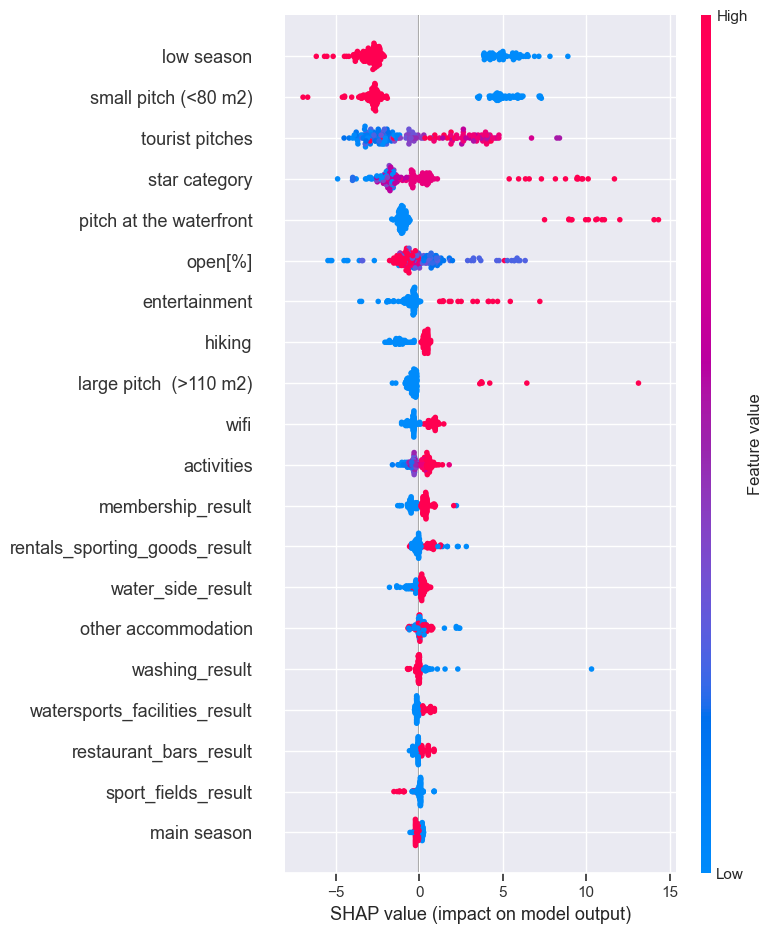

In [752]:
import shap
explainer = shap.Explainer(model_gradient)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

### Gradient Boost (XGBoost)

In [753]:
model_xgb = XGBRegressor()
model_xgb = model_xgb.fit(X_train.values, y_train.values)
y_test_pred = model_xgb.predict(X_test.values)
print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_xgb, X_train.values, y_train.values, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_xgb, X_train.values, y_train.values, cv=4, scoring='neg_mean_squared_error').mean()}")
mse_grXG = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_grXG}')

R2 Kreuzvalidierung Training: 0.6604510090146363
MSE Kreuzvalidierung Training: 73.29708597120327
MSE Testdaten: 47.322138548654294


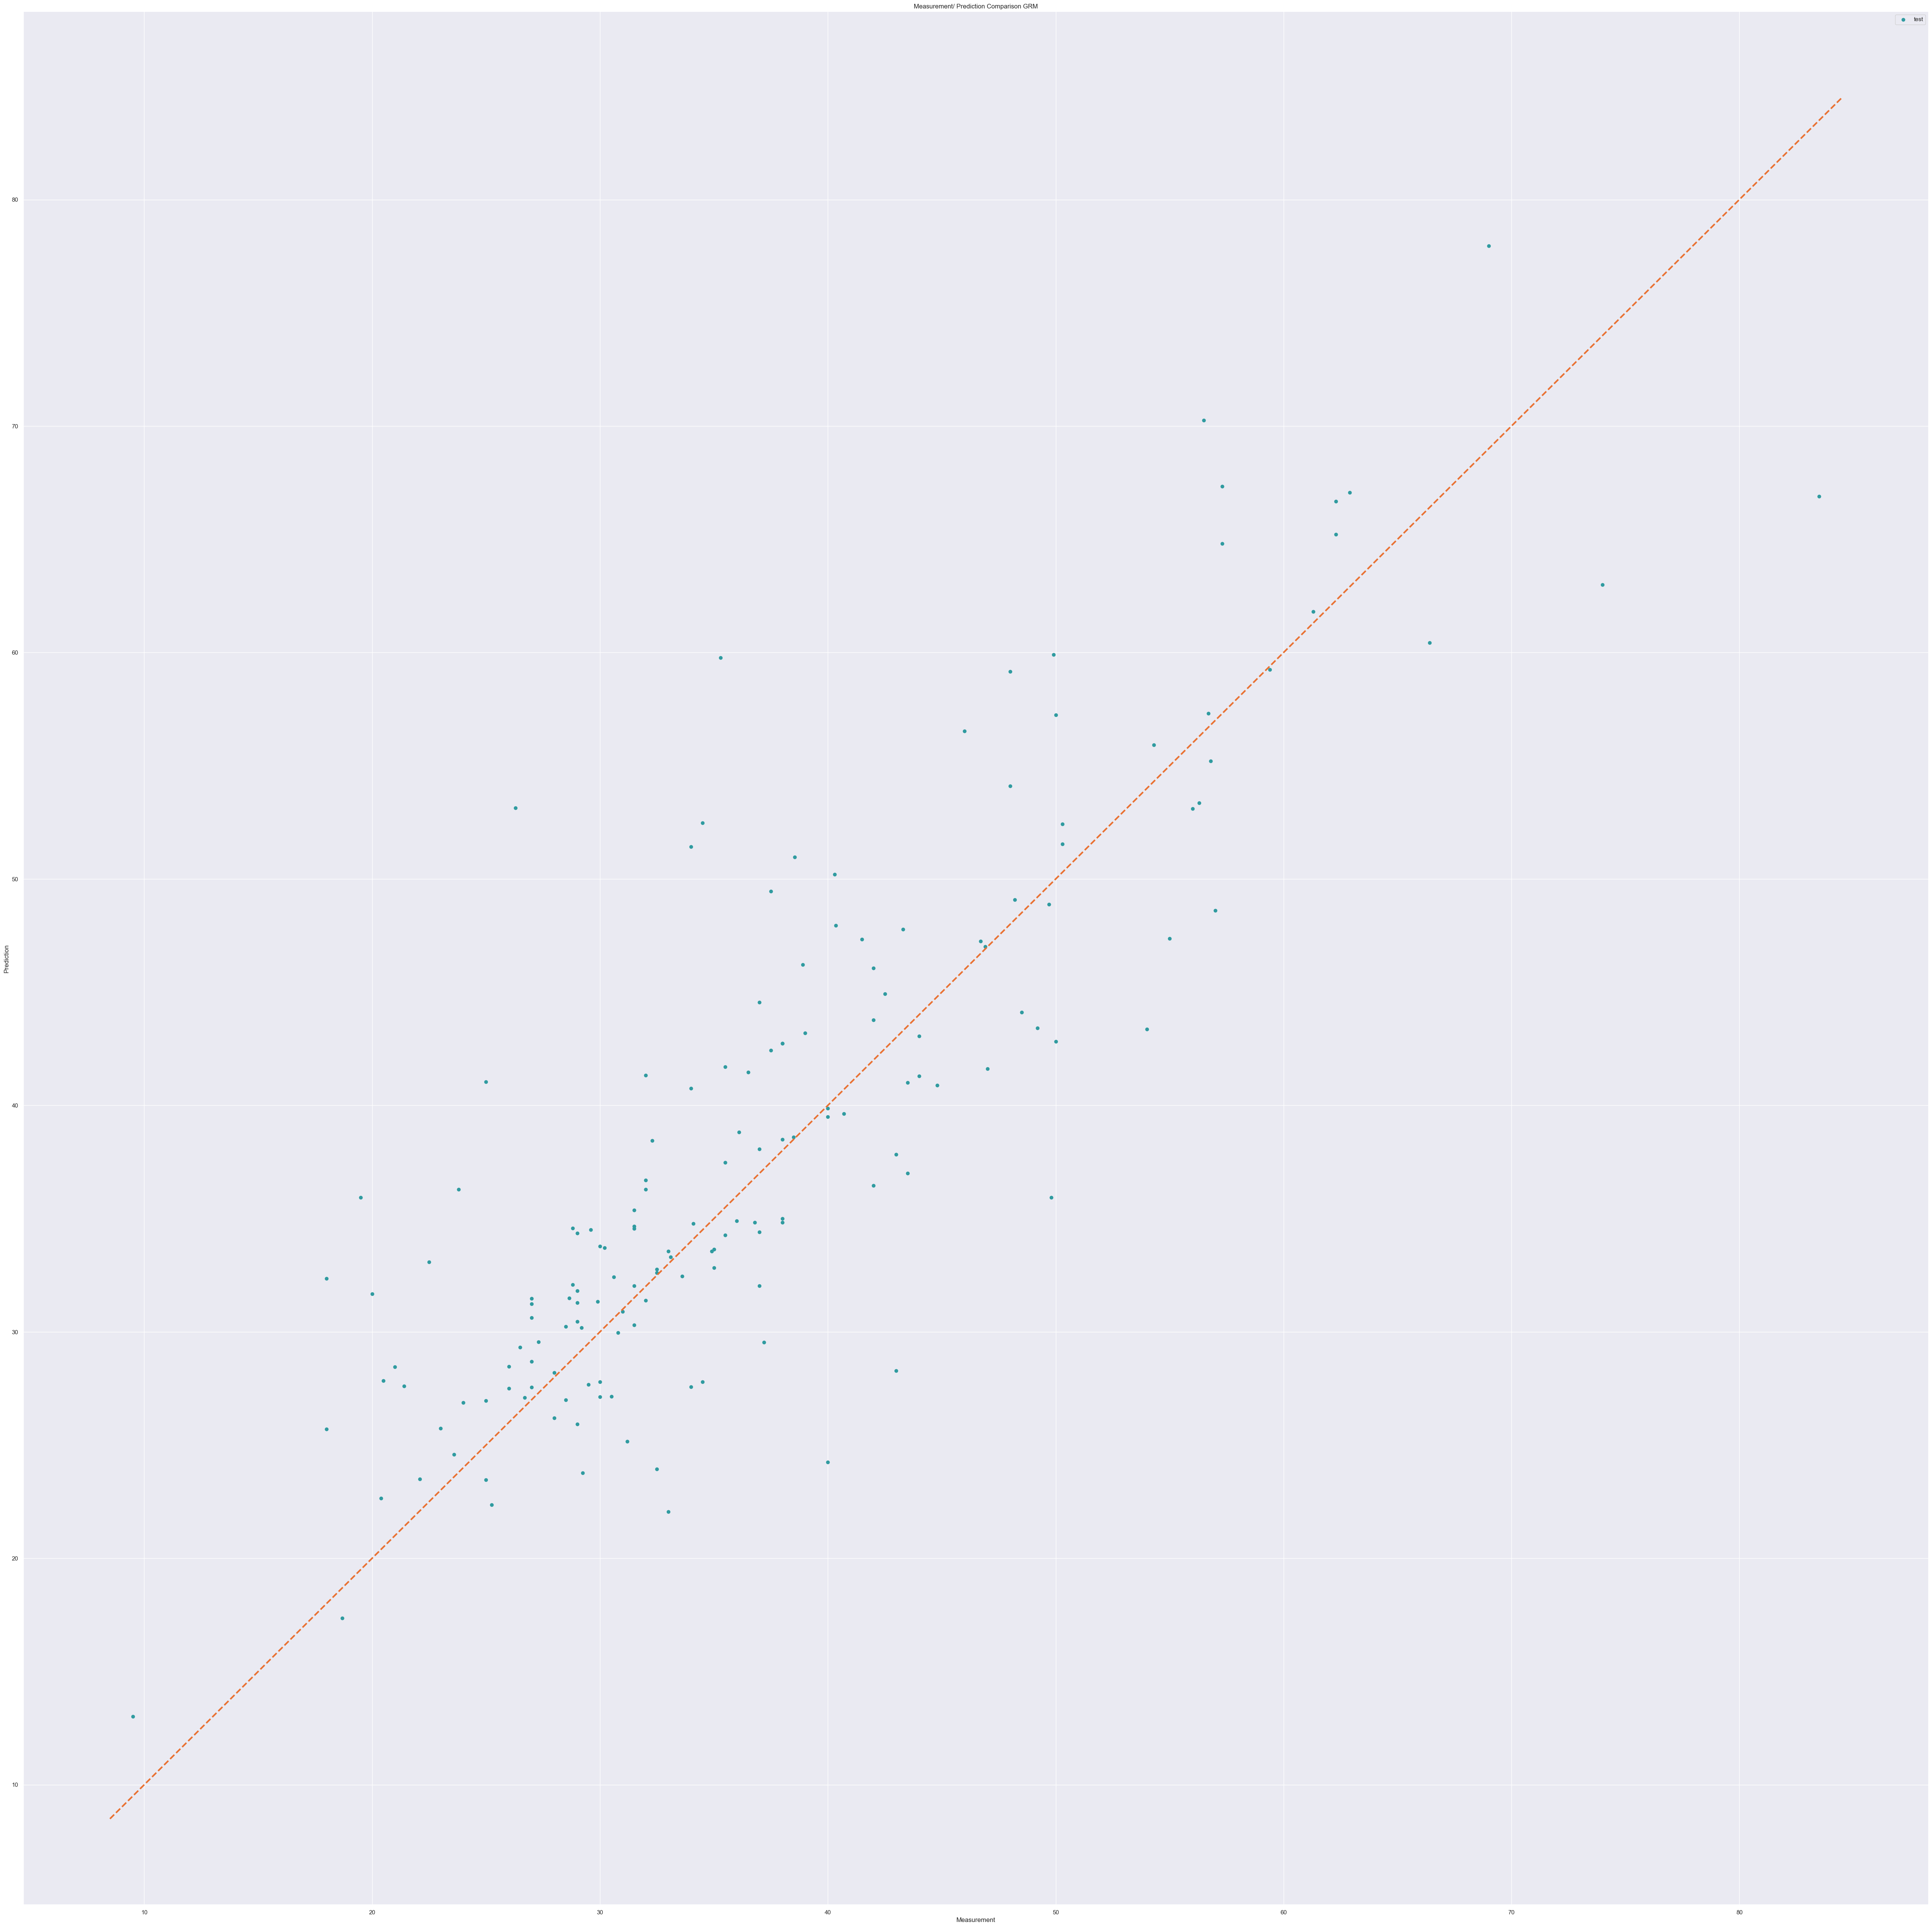

In [754]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison GRM')
plt.legend()
#plt.savefig('XGB.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die oragne Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.

In [755]:
feature_importances = model_xgb.feature_importances_

feature_names = ['sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result']

# Kombiniere Feature-Namen mit deren Wichtigkeiten
feature_importance_with_names = list(zip(feature_names, feature_importances))

# Sortiere nach Wichtigkeit absteigend
feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Feature-Importance mit Feature-Namen
for feature, importance in feature_importance_with_names_sorted:
    print(f"{feature}: {importance}")

entertainment: 0.1762046068906784
low season: 0.10229746252298355
star category: 0.09812985360622406
small pitch (<80 m2): 0.08850069344043732
tourist pitches: 0.05571170151233673
pitch at the waterfront: 0.05165501683950424
sport_fields_result: 0.03753261640667915
membership_result: 0.03222867101430893
other accommodation: 0.031988807022571564
kitchen: 0.02883654646575451
large pitch  (>110 m2): 0.02865147963166237
open[%]: 0.026652539148926735
activities: 0.022801125422120094
rentals_sporting_goods_result: 0.021209103986620903
watersports_facilities_result: 0.019491197541356087
washing_result: 0.019048120826482773
TV lounge: 0.01901666820049286
hiking: 0.01847304031252861
medium pitch  (~100 m2): 0.01753196120262146
restaurant_bars_result: 0.015350563451647758
animals allowed: 0.013764966279268265
public_transport_result: 0.013055139221251011
water_side_result: 0.012708689086139202
shopping_result: 0.011997541412711143
BBQ area: 0.007755456957966089
playground: 0.0076034897938370705


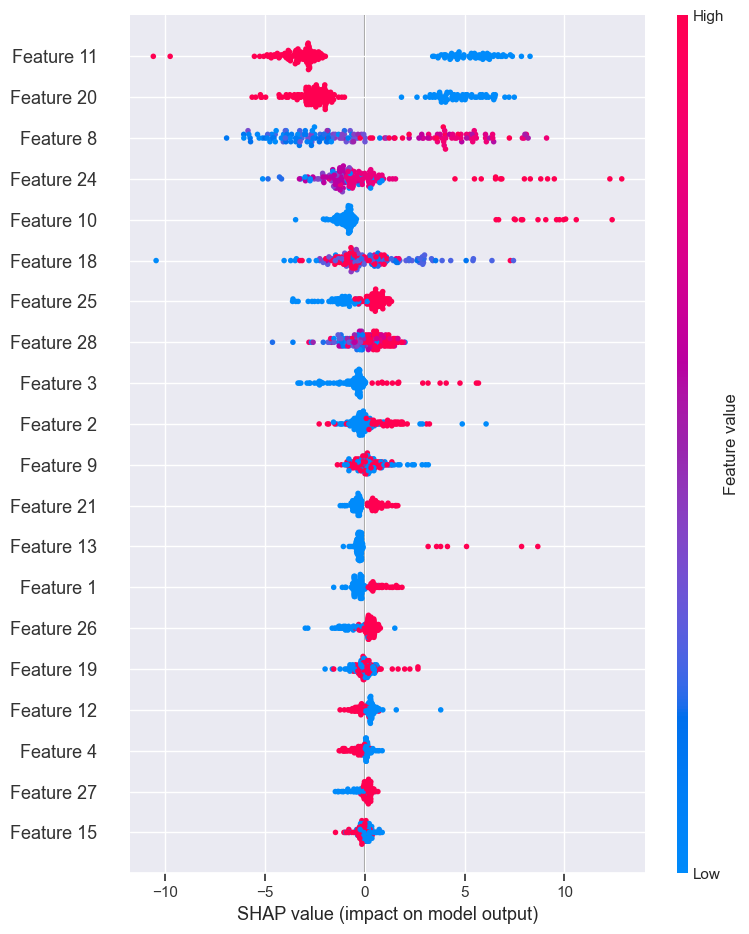

In [756]:
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_test.values)
shap.summary_plot(shap_values, X_test.values)

### Gradient Boost (GBLight)

In [758]:
model_lgbm  = LGBMRegressor()
model_lgbm = model_lgbm .fit(X_train.values, y_train.values)
y_test_pred = model_lgbm .predict(X_test.values)
print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_lgbm , X_train.values, y_train.values, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_lgbm , X_train.values, y_train.values, cv=4, scoring='neg_mean_squared_error').mean()}")
mse_grLG = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_grLG}')

# Bedeutung Warnung: der Algorithmus kann keine weiteren sinnvollen Splits für die Entscheidungsbäume finden konnte. Gründe: z.B. zu wenig Daten, nicht ausreichende Varianz in den Daten oder zu geringe Komplexität der Modelleinstellungen.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 644, number of used features: 29
[LightGBM] [Info] Start training from score 38.949224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

### Ergebnisübersicht

In [759]:
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosted Regressor', 'XGBoost', 'LightBoost',],
    'R2 Kreuzvalidierung Training': [
        cross_val_score(model_lin, X_train, y_train, cv=4).mean(),
        cross_val_score(model_random, X_train, y_train, cv=4).mean(),
        cross_val_score(model_gradient, X_train, y_train, cv=4).mean(),
        cross_val_score(model_xgb, X_train.values, y_train.values, cv=4).mean(),
        cross_val_score(model_lgbm , X_train.values, y_train.values, cv=4).mean()
    ],
    'MSE Kreuzvalidierung Training': [
        -cross_val_score(model_lin, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean(),
        -cross_val_score(model_random, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean(),
        -cross_val_score(model_gradient, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean(),
        -cross_val_score(model_xgb, X_train.values, y_train.values, cv=4, scoring='neg_mean_squared_error').mean(),
        -cross_val_score(model_lgbm , X_train.values, y_train.values, cv=4, scoring='neg_mean_squared_error').mean()

    ],
    'MSE Testdaten': [
        mse_lr,
        mse_rf,
        mse_gr,
        mse_grXG,
        mse_grLG
    ]
}
df_results = pd.DataFrame(data)
df_results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 28
[LightGBM] [Info] Start training from score 38.930104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Model  R2 Kreuzvalidierung Training  \
0           Linear Regression                 -1.472603e+21   
1               Random Forest                  6.082080e-01   
2  Gradient Boosted Regressor                  6.736250e-01   
3                     XGBoost                  6.604510e-01   
4                  LightBoost                  6.639812e-01   

   MSE Kreuzvalidierung Training  MSE Testdaten  
0                   3.334280e+23      77.987792  
1                   8.579832e+01      63.563963  
2                   7.124025e+01      56.544767  
3                   7.329709e+01      47.322139  
4                   7.301359e+01      54.737063

# Hyperparameter Tuning
Loss function: Select the appropriate loss function based on the problem type and desired error metric (e.g., MSE for regression, log loss for classification).
Learning rate: Controls the step size taken by each new tree. Start with a small value and gradually increase until performance plateaus or declines.
Number of trees: More trees can improve accuracy but also increase complexity and risk of overfitting. Use cross-validation to find the optimal number.
Tree depth: Controls the complexity of each tree. Deeper trees can capture more intricate relationships but are more prone to overfitting. Tune this parameter along with the number of trees.
Regularization parameters: L1 regularization penalizes the number of nonzero coefficients, leading to sparse models. L2 regularization shrinks coefficients towards zero, reducing variance. Experiment with both to find the best fit.

In [760]:
from sklearn.model_selection import GridSearchCV

## Gradient Boosting Regressor

In [761]:
# Parameter für GridSearch festlegen
param_grid = {
    'n_estimators': [625, 650, 675],            # -> Anzahl der Bäume im Modell
    'learning_rate': [0.05, 0.1, 0.15],         # -> Lernrate des Modells (kleinere Lernrate = höhere Anzahl von Bäumen)
    'max_depth': [4, 5],                        # -> Maximale Tiefe der einzelnen Entscheidungsbäume
    'min_samples_split': [2,3, 4],             # -> Minimale Anzahl von Samples, die erforderlich sind, um einen Split durchzuführen
    'min_samples_leaf': [1, 2],                 # -> Mindestanzahl von Samples, die ein Blattknoten haben muss.
    'subsample': [0.78, 0.8, 0.82]              # -> Der Anteil der Trainingsdaten, der für jeden einzelnen Baum verwendet wird
}
# Basismodell
model_gradient = GradientBoostingRegressor(random_state= 42)

# GridSeach Modell initialisieren
grid_search = GridSearchCV(estimator = model_gradient, param_grid = param_grid, cv = 6, n_jobs = -1, verbose = 2)

# GridSeach Modell fitten
grid_search.fit(X_train.values, y_train.values)

# Beste Parameter und bestes Modell
best_model  = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Bestes Modell:", best_model )
print("Beste Parameter:", best_params)
print("Bester Score:", best_score )

Fitting 6 folds for each of 324 candidates, totalling 1944 fits
Bestes Modell: GradientBoostingRegressor(max_depth=4, n_estimators=675, random_state=42,
                          subsample=0.78)
Beste Parameter: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 675, 'subsample': 0.78}
Bester Score: -0.765969230053125


In [762]:
print(f'R2 Kreuzvalidierung Training: {cross_val_score(best_model, X_train, y_train, cv=6).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(best_model, X_train, y_train, cv=6, scoring='neg_mean_squared_error').mean()}")

R2 Kreuzvalidierung Training: 0.765969230053125
MSE Kreuzvalidierung Training: 50.73600635217675


In [763]:
# modell mit bestem Parameter trainieren und testen
y_test_pred_best = best_model.predict(X_test)
mse_grXG = mean_squared_error(y_test, y_test_pred_best)
print(f'MSE Testdaten: {mse_grXG}')

# modell mit bestem Parameter trainieren und testen
y_train_pred_best = best_model.predict(X_train)
mse_grXG_train = mean_squared_error(y_train, y_train_pred_best)
print(f'MSE Trainingsdaten: {mse_grXG_train}')

MSE Testdaten: 35.54223516134146
MSE Trainingsdaten: 1.0588026898574334


C:\Users\sarak\Documents\GitHub\Masterarbeit_Camping\venv\Scripts\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\sarak\Documents\GitHub\Masterarbeit_Camping\venv\Scripts\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


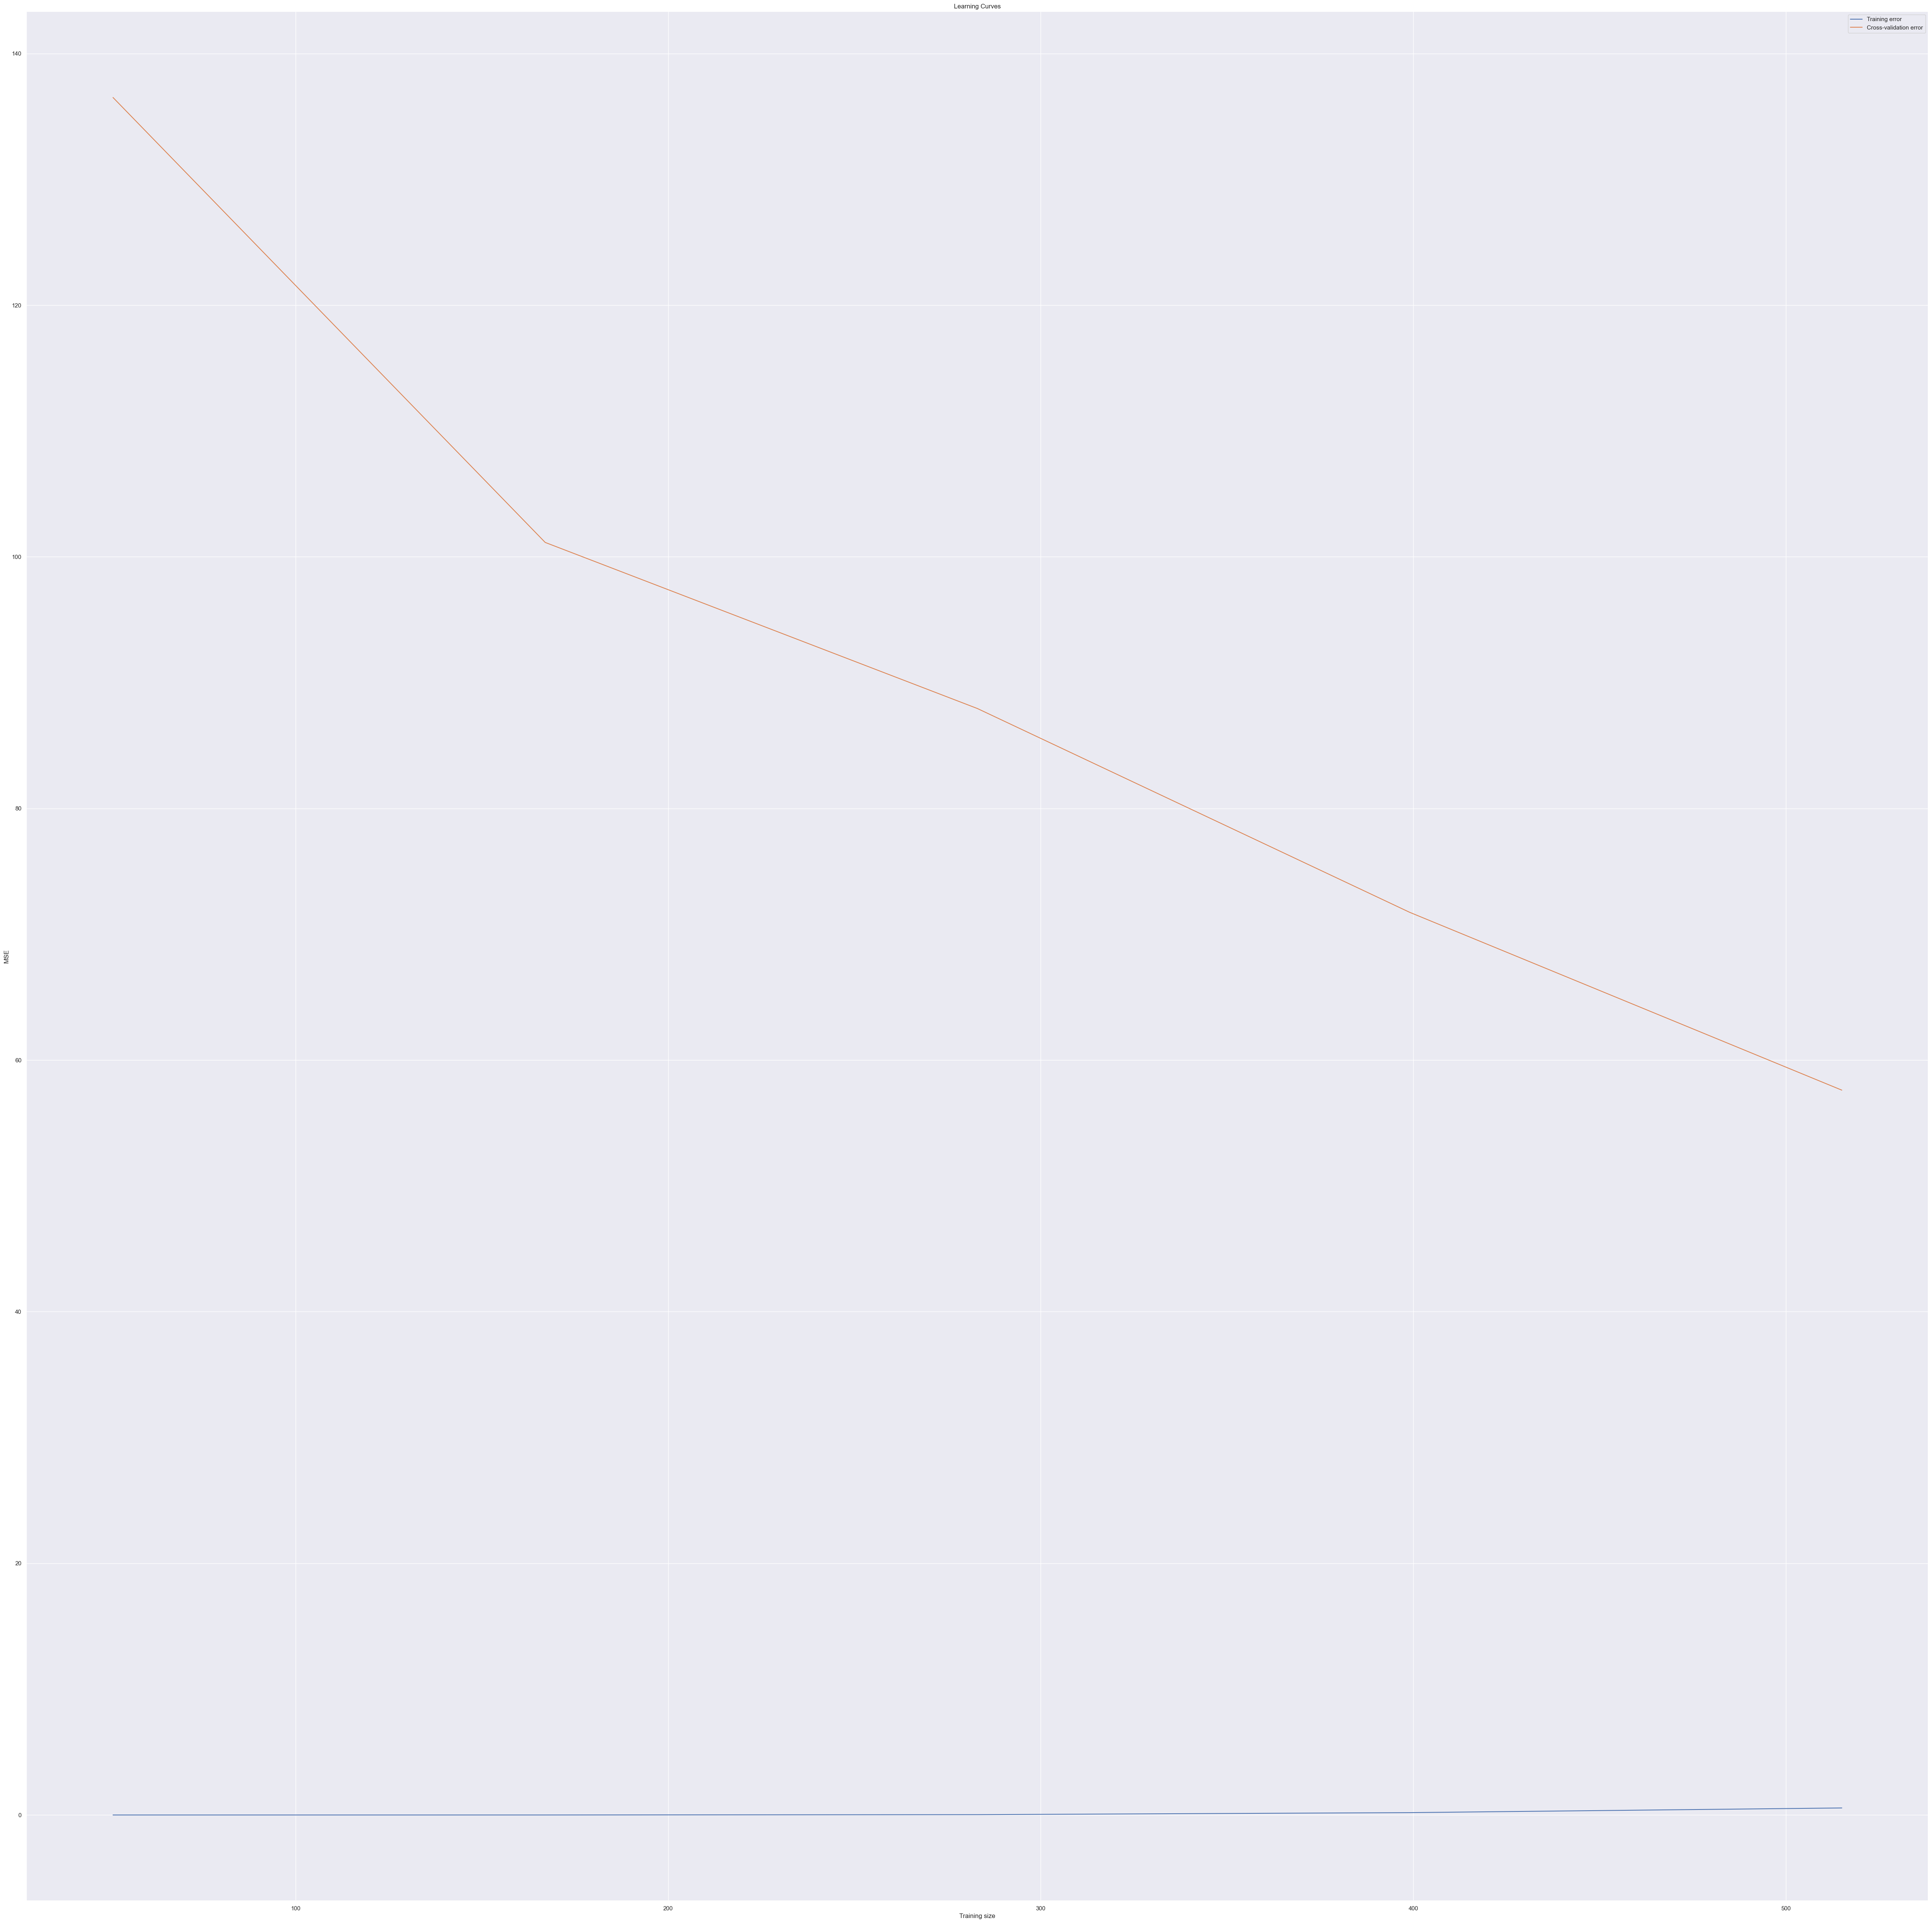

In [769]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.legend()
plt.title('Learning Curves')
plt.show()

#### Resultate


In [ ]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison GRM_best')
plt.legend()
#plt.savefig('GB_best.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die oragne Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.

In [764]:
feature_importances = best_model.feature_importances_

feature_names = ['sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result']

# Kombiniere Feature-Namen mit deren Wichtigkeiten
feature_importance_with_names = list(zip(feature_names, feature_importances))

# Sortiere nach Wichtigkeit absteigend
feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Feature-Importance mit Feature-Namen
for feature, importance in feature_importance_with_names_sorted:
    print(f"{feature}: {importance}")

tourist pitches: 0.23537522886168777
star category: 0.10746959276320785
low season: 0.10409790307766577
small pitch (<80 m2): 0.10249919188453005
open[%]: 0.07431867921121459
pitch at the waterfront: 0.0725695511355509
entertainment: 0.03796731556887652
activities: 0.03779261785312619
main season: 0.025448941986851922
large pitch  (>110 m2): 0.02233711562438201
other accommodation: 0.02143106470238728
medium pitch  (~100 m2): 0.020255907697269433
sport_fields_result: 0.01805405226861569
rentals_sporting_goods_result: 0.016488236603572102
animals allowed: 0.013614548103658928
hiking: 0.011924062901000352
TV lounge: 0.011683466707041412
washing_result: 0.010997095303303674
membership_result: 0.00941529619199801
watersports_facilities_result: 0.007970439814025617
water_side_result: 0.006429088852997157
shopping_result: 0.00588231463122471
BBQ area: 0.005439920367645931
wifi: 0.004756605037254637
kitchen: 0.003983123027896995
restaurant_bars_result: 0.003566319681521296
public_transport_re

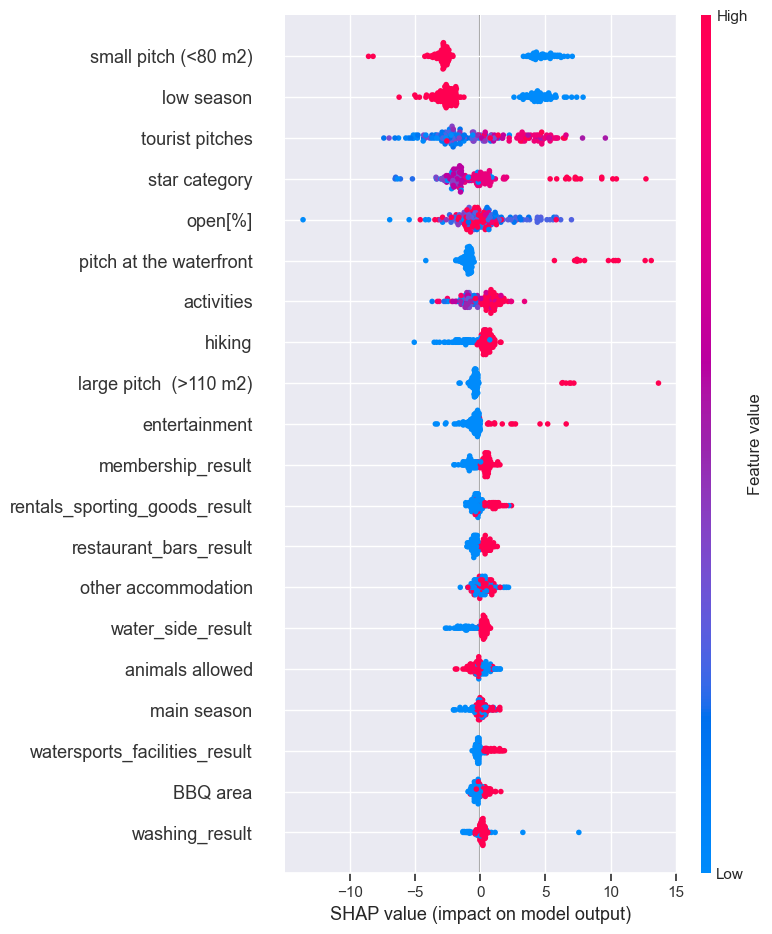

In [765]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

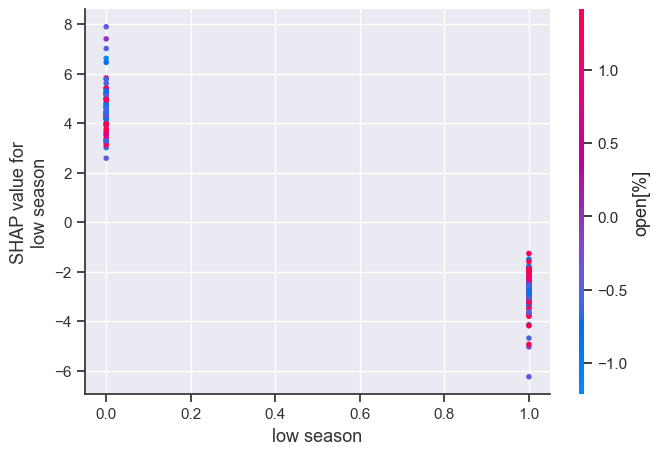

In [766]:
#shap.dependence_plot('main season', shap_values.values, X_test, feature_names=X_test.columns)
shap.dependence_plot('low season', shap_values.values, X_test, interaction_index='open[%]')

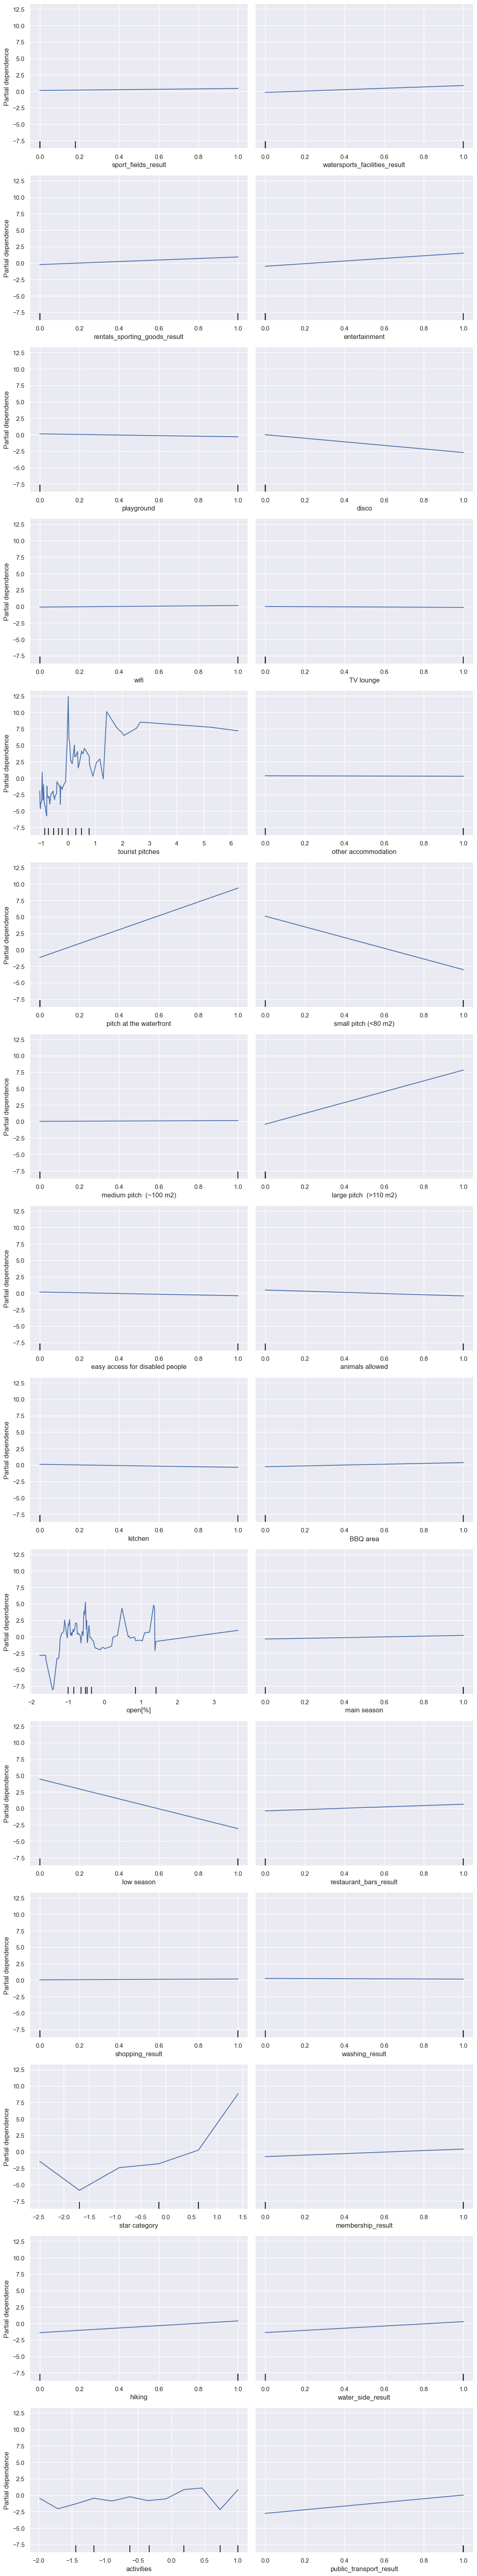

In [767]:
n_cols = 2
n_rows = int(len(X_train.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,64))
PartialDependenceDisplay.from_estimator(best_model, X_train, X_train.columns, ax=ax, n_cols=n_cols)
#fig.suptitle('Partial Dependence Plots')
fig.tight_layout()